
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

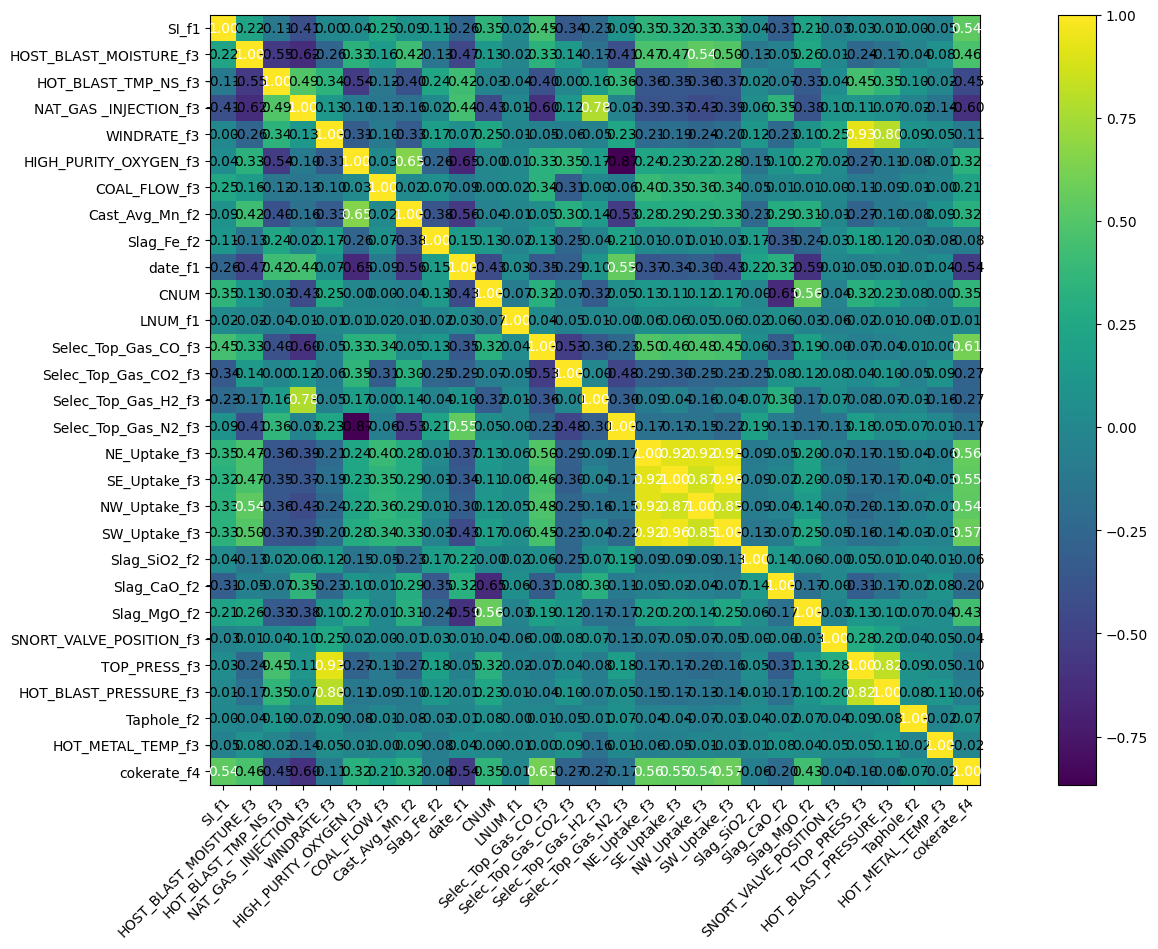

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

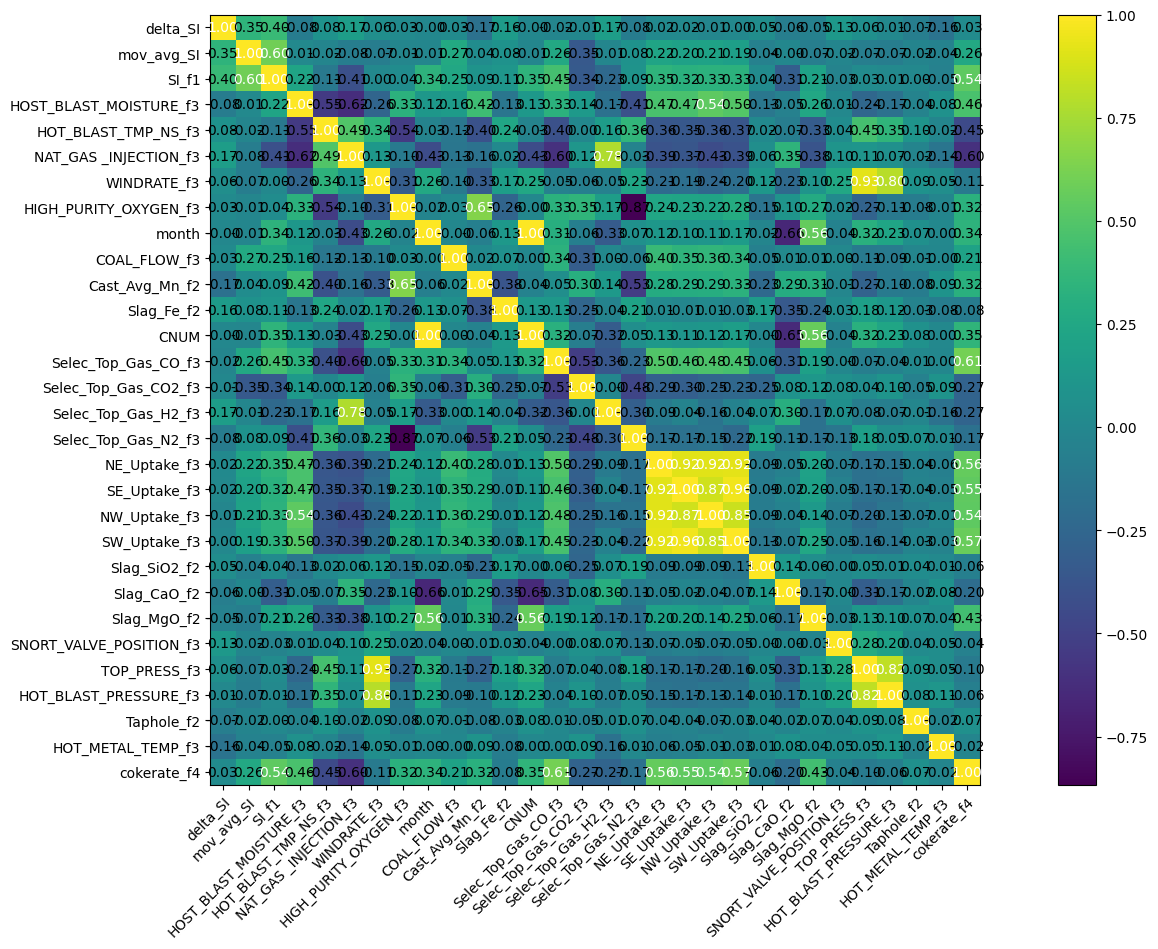

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.095256
Loss_SI: 1.210455298423767 Loss_all: 1.1329420804977417
===


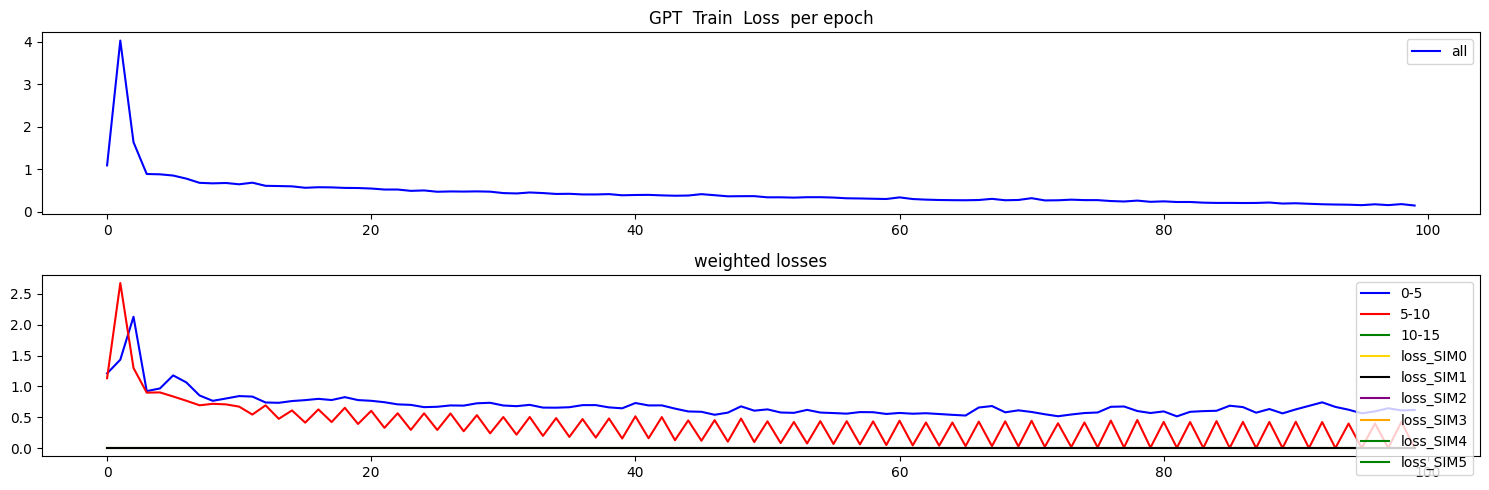

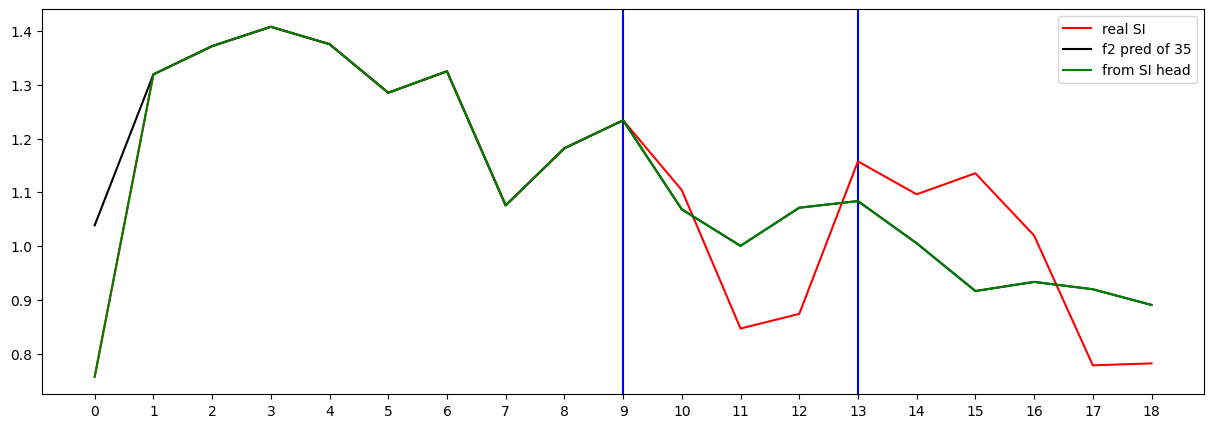

Testing R**2 - (all) - (no inputs):  0.9899993291015305
Testing R**2 - (f2) - SI full (no inputs):  0.24679691235196533
Testing R**2 - SI head only (no inputs):  0.24679691235196533
0 ...index R**2 (no inputs):  0.33421224765526714
1 ...index R**2 (no inputs):  -3.7890173907202085
2 ...index R**2 (no inputs):  0.24679691235196533
3 ...index R**2 (no inputs):  -322.6507289802435
4 ...index R**2 (no inputs):  -0.6728766684110348
5 ...index R**2 (no inputs):  -4.501033750565427
6 ...index R**2 (no inputs):  -13.074271905041599
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3365114411639123
10 ...index R**2 (no inputs):  -1.6261690125570802
11 ...index R**2 (no inputs):  -153.625370036915
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.49660475294891127
16 ...index R**2 (no inputs):  -0.6857308874391481
17 ...index R**2 (no inputs):  -304.66303227

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.104555
Loss_SI: 1.543144941329956 Loss_all: 1.2076013088226318
===


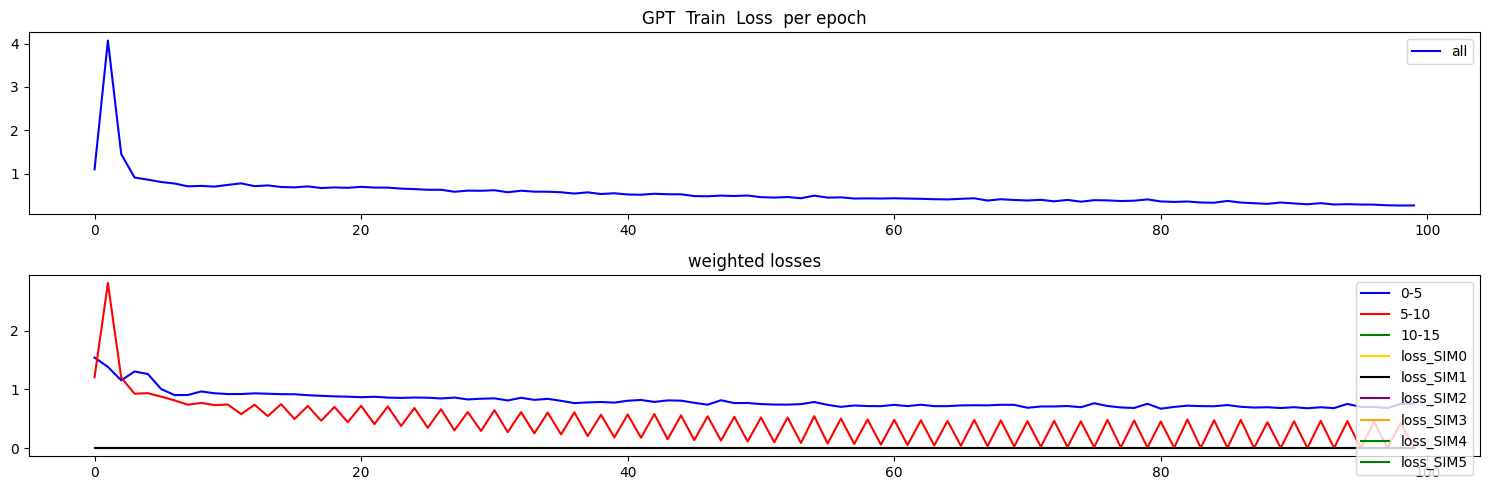

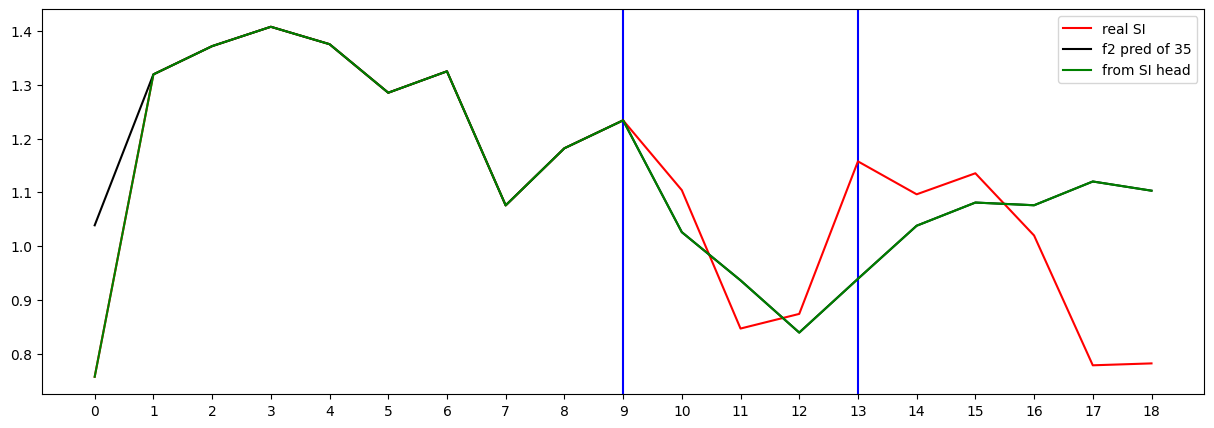

Testing R**2 - (all) - (no inputs):  0.9967872540303189
Testing R**2 - (f2) - SI full (no inputs):  -1.3276262036805564
Testing R**2 - SI head only (no inputs):  -1.3276262036805564
0 ...index R**2 (no inputs):  -0.26150409887321113
1 ...index R**2 (no inputs):  -5.2453994773412695
2 ...index R**2 (no inputs):  -1.3276262036805564
3 ...index R**2 (no inputs):  -374.53567400730844
4 ...index R**2 (no inputs):  -0.40403646681068417
5 ...index R**2 (no inputs):  -0.7337080572923977
6 ...index R**2 (no inputs):  -138.19344928777522
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7305798008866247
10 ...index R**2 (no inputs):  -2.645239492420436
11 ...index R**2 (no inputs):  -145.79863925841417
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.07699498523841
16 ...index R**2 (no inputs):  -1.2368690944901508
17 ...index R**2 (no inputs):  -391.020851

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.234099
Loss_SI: 1.2538169622421265 Loss_all: 1.2879620790481567
===


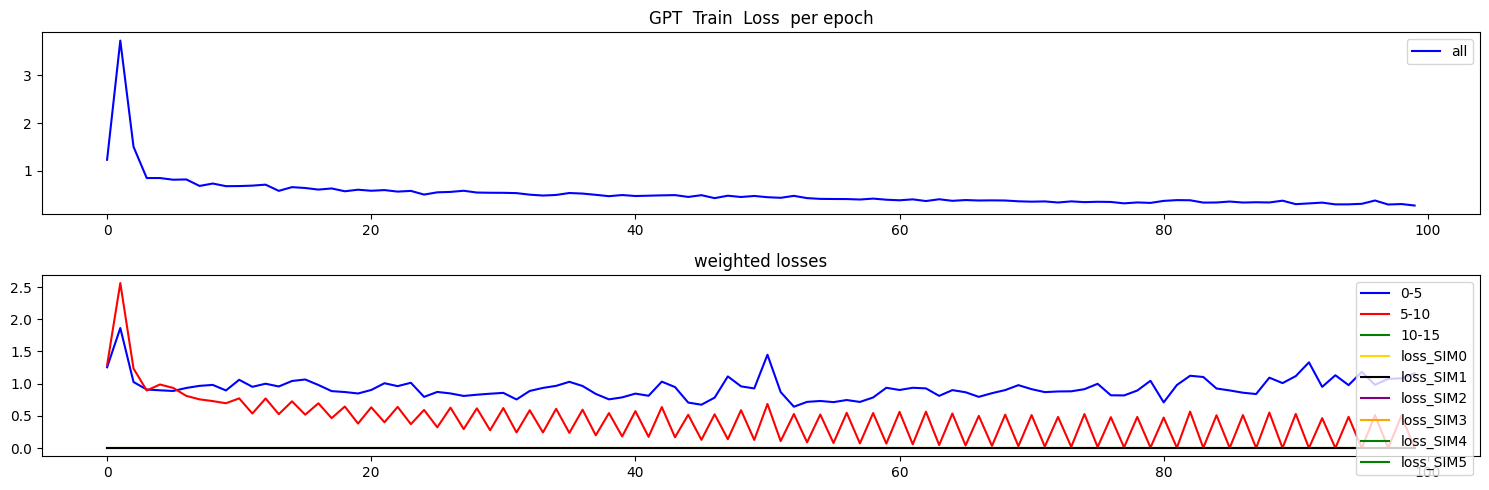

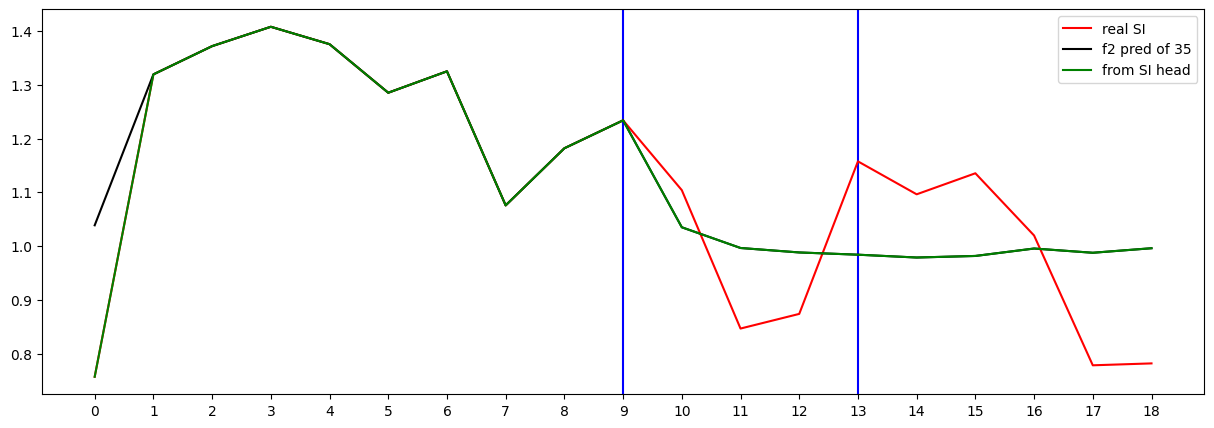

Testing R**2 - (all) - (no inputs):  0.9939237007522043
Testing R**2 - (f2) - SI full (no inputs):  -0.23551523148866194
Testing R**2 - SI head only (no inputs):  -0.23551523148866194
0 ...index R**2 (no inputs):  0.16860597629939122
1 ...index R**2 (no inputs):  -6.770681919323794
2 ...index R**2 (no inputs):  -0.23551523148866194
3 ...index R**2 (no inputs):  -890.7725345056484
4 ...index R**2 (no inputs):  -0.7182030285804637
5 ...index R**2 (no inputs):  -2.232147053580458
6 ...index R**2 (no inputs):  -79.0712360285418
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3262583723133907
10 ...index R**2 (no inputs):  -0.024295821403170326
11 ...index R**2 (no inputs):  -281.3634367112813
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.06592826220317582
16 ...index R**2 (no inputs):  -0.7840814584270293
17 ...index R**2 (no inputs):  -2547.6603

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.218770
Loss_SI: 1.285786747932434 Loss_all: 1.2456339597702026
===


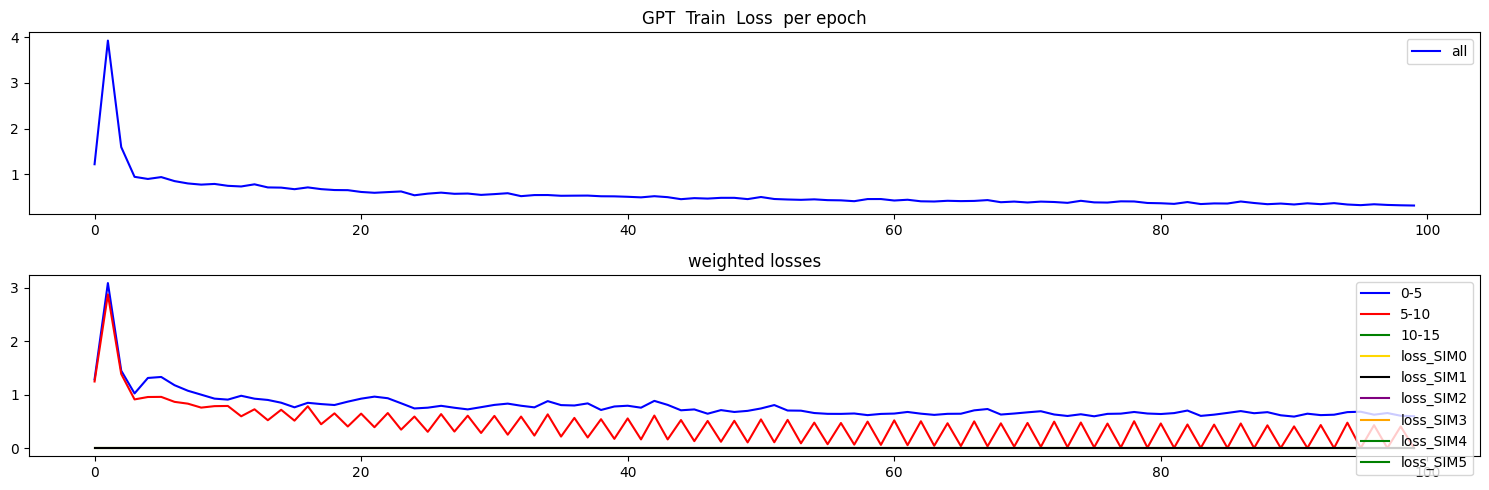

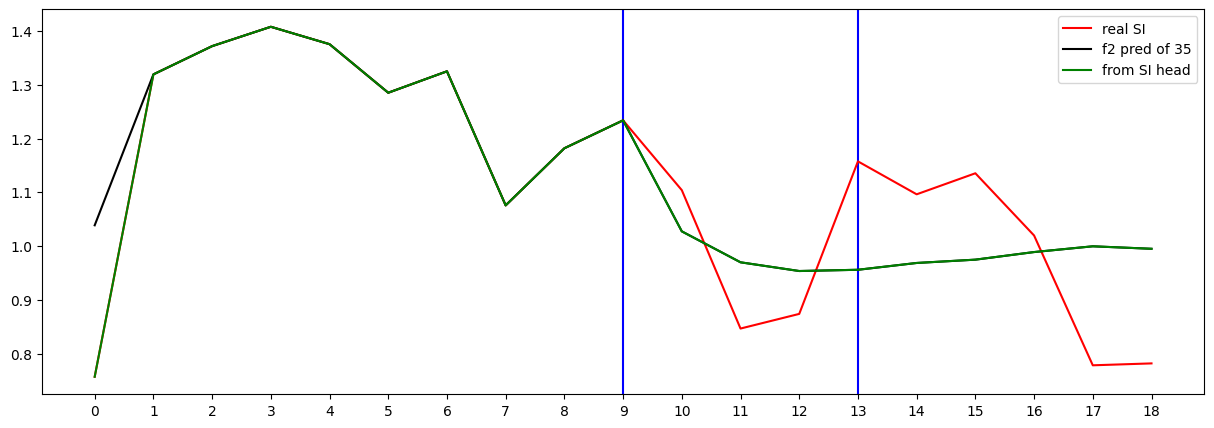

Testing R**2 - (all) - (no inputs):  0.9960909664920511
Testing R**2 - (f2) - SI full (no inputs):  -0.3149343327670173
Testing R**2 - SI head only (no inputs):  -0.3149343327670173
0 ...index R**2 (no inputs):  0.0325805542036135
1 ...index R**2 (no inputs):  -7.615702637605009
2 ...index R**2 (no inputs):  -0.3149343327670173
3 ...index R**2 (no inputs):  -562.1102061992165
4 ...index R**2 (no inputs):  -0.6356516966966064
5 ...index R**2 (no inputs):  -1.0526033219687534
6 ...index R**2 (no inputs):  -72.23343158960198
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.41436335906421906
10 ...index R**2 (no inputs):  -0.5461972411716514
11 ...index R**2 (no inputs):  -283.8907230615846
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4313440102042536
16 ...index R**2 (no inputs):  -0.6049789621825064
17 ...index R**2 (no inputs):  -2095.83432617

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.203322
Loss_SI: 1.4556446075439453 Loss_all: 1.1888164281845093
===


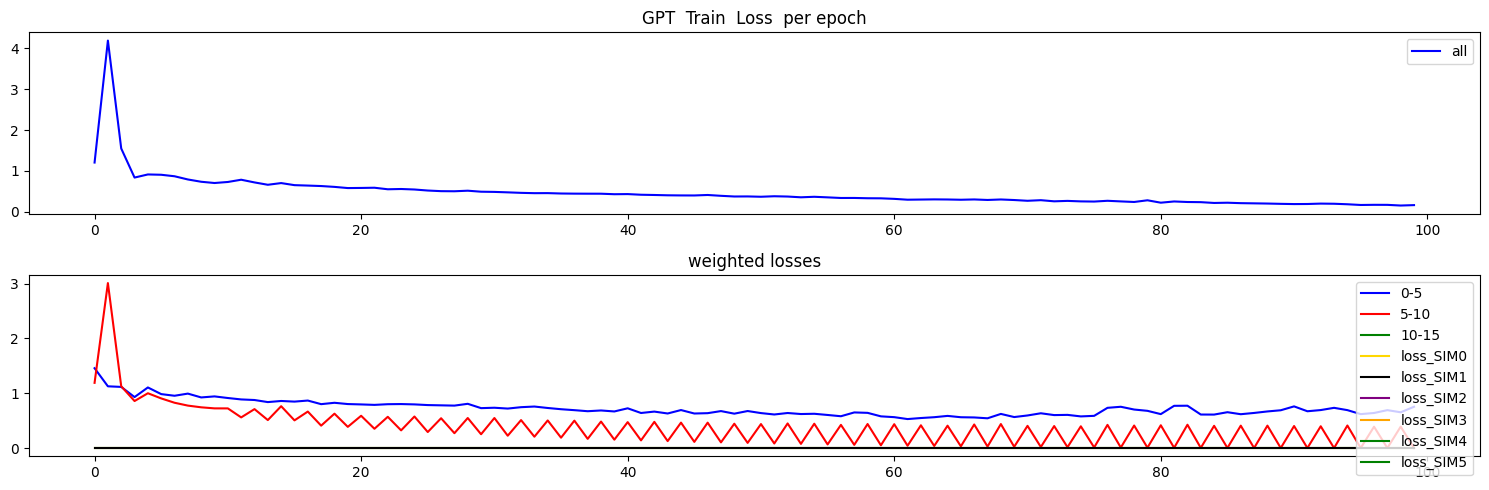

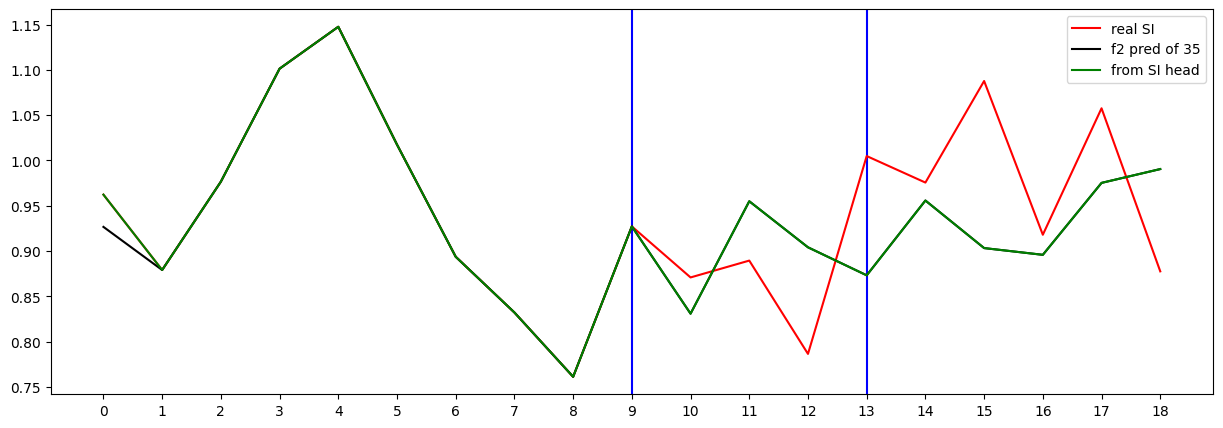

Testing R**2 - (all) - (no inputs):  0.9987190369895038
Testing R**2 - (f2) - SI full (no inputs):  -0.5006344040982009
Testing R**2 - SI head only (no inputs):  -0.5006344040982009
0 ...index R**2 (no inputs):  -0.4882523161798007
1 ...index R**2 (no inputs):  -0.7078910942088079
2 ...index R**2 (no inputs):  -0.5006344040982009
3 ...index R**2 (no inputs):  -0.757888691895408
4 ...index R**2 (no inputs):  -4.921175247455354
5 ...index R**2 (no inputs):  -0.06983001999536254
6 ...index R**2 (no inputs):  -0.45326396841672056
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6855581446829404
10 ...index R**2 (no inputs):  -0.19807266537988144
11 ...index R**2 (no inputs):  -0.7732641197482366
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.22221681215856615
16 ...index R**2 (no inputs):  -0.7857203470485759
17 ...index R**2 (no inputs):  -1.11104

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.322166
Loss_SI: 1.1341949701309204 Loss_all: 1.2803517580032349
===


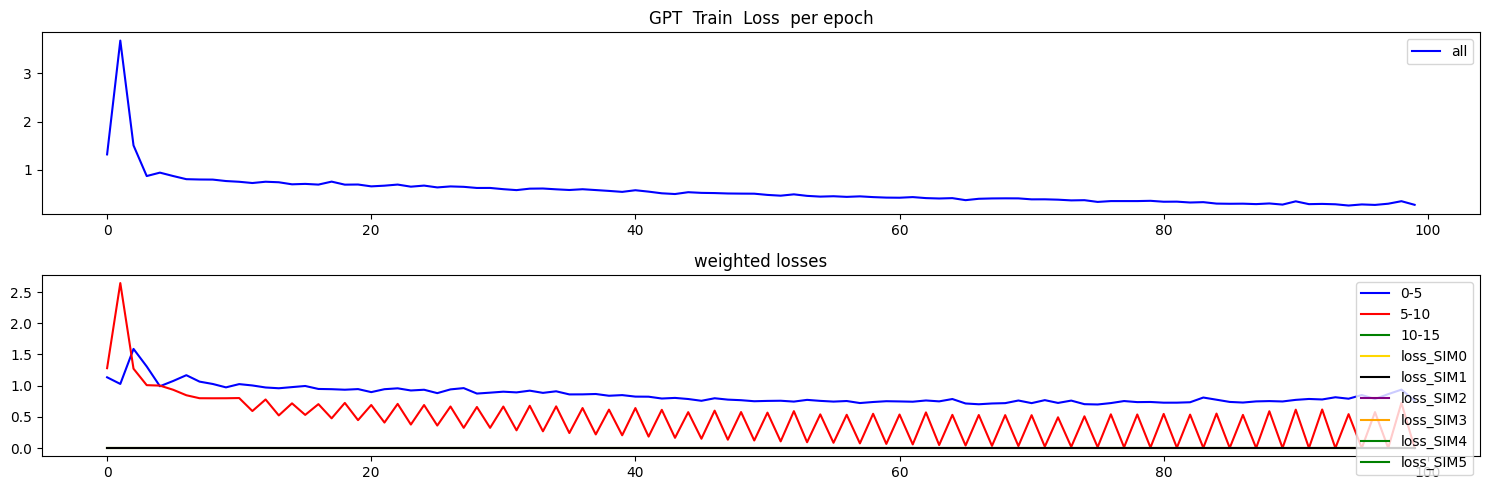

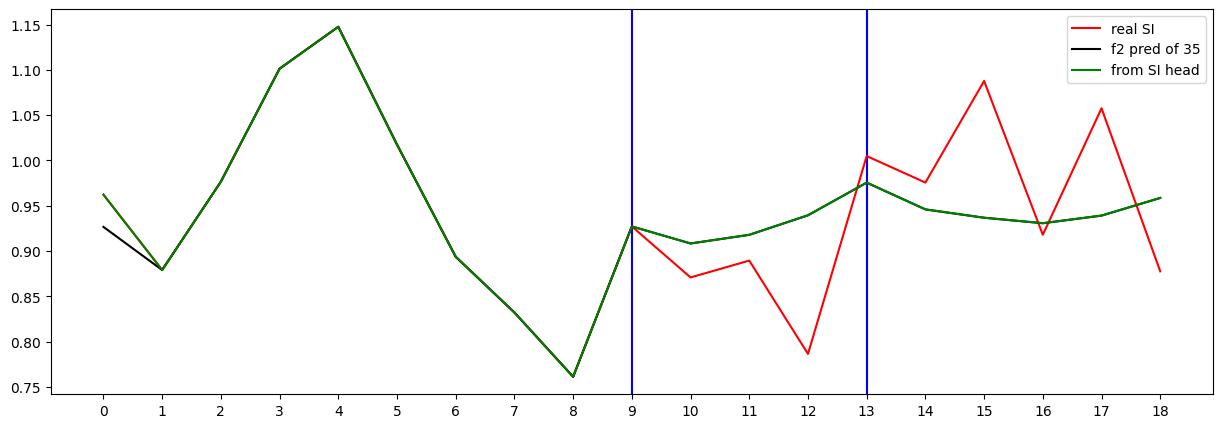

Testing R**2 - (all) - (no inputs):  0.9984751737594713
Testing R**2 - (f2) - SI full (no inputs):  0.1234896361447042
Testing R**2 - SI head only (no inputs):  0.1234896361447042
0 ...index R**2 (no inputs):  -0.06887404421909293
1 ...index R**2 (no inputs):  -0.7652452840913357
2 ...index R**2 (no inputs):  0.1234896361447042
3 ...index R**2 (no inputs):  0.7164998251584689
4 ...index R**2 (no inputs):  -3.0284432724155668
5 ...index R**2 (no inputs):  -0.24297369979441452
6 ...index R**2 (no inputs):  -0.20168782307234223
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2728340305741217
10 ...index R**2 (no inputs):  -0.05870854684104154
11 ...index R**2 (no inputs):  -208.17184855299962
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10167533632800119
16 ...index R**2 (no inputs):  -0.9246034121233069
17 ...index R**2 (no inputs):  -390.1772

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.106781
Loss_SI: 1.1213711500167847 Loss_all: 1.1976872682571411
===


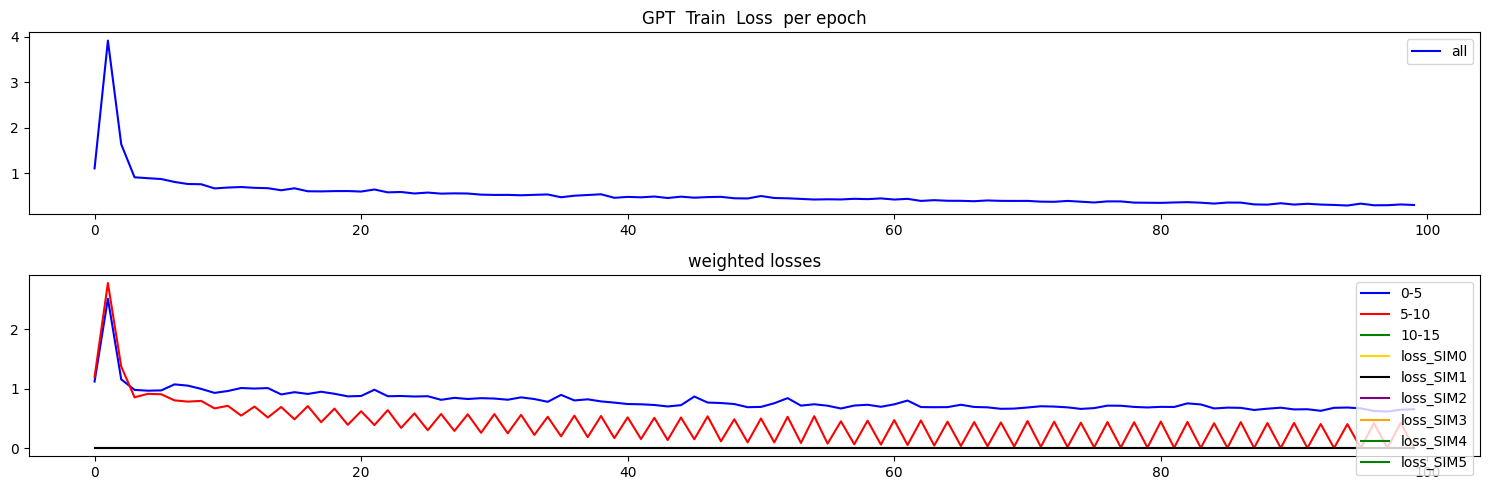

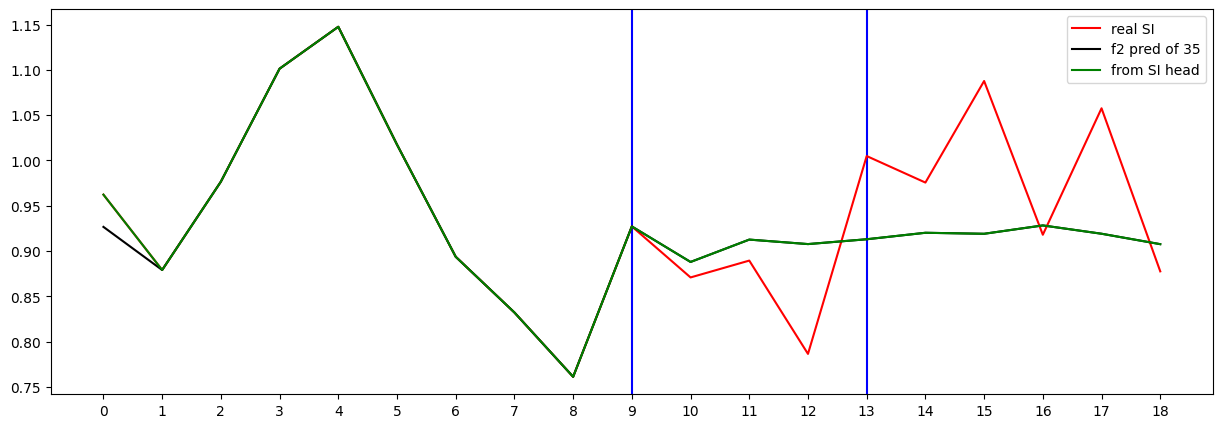

Testing R**2 - (all) - (no inputs):  0.999156971151817
Testing R**2 - (f2) - SI full (no inputs):  -0.1093107940918483
Testing R**2 - SI head only (no inputs):  -0.1093107940918483
0 ...index R**2 (no inputs):  -0.12104711153101566
1 ...index R**2 (no inputs):  -1.8040599147072078
2 ...index R**2 (no inputs):  -0.1093107940918483
3 ...index R**2 (no inputs):  0.06484064838137216
4 ...index R**2 (no inputs):  -9.757322440722326
5 ...index R**2 (no inputs):  0.2945825866999363
6 ...index R**2 (no inputs):  -0.25112475019280645
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.065246715134053
10 ...index R**2 (no inputs):  0.08050176853948554
11 ...index R**2 (no inputs):  -32.81999423831693
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.01796907256492286
16 ...index R**2 (no inputs):  0.013643997146085107
17 ...index R**2 (no inputs):  -26.1395619

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.261838
Loss_SI: 1.4507168531417847 Loss_all: 1.2662596702575684
===


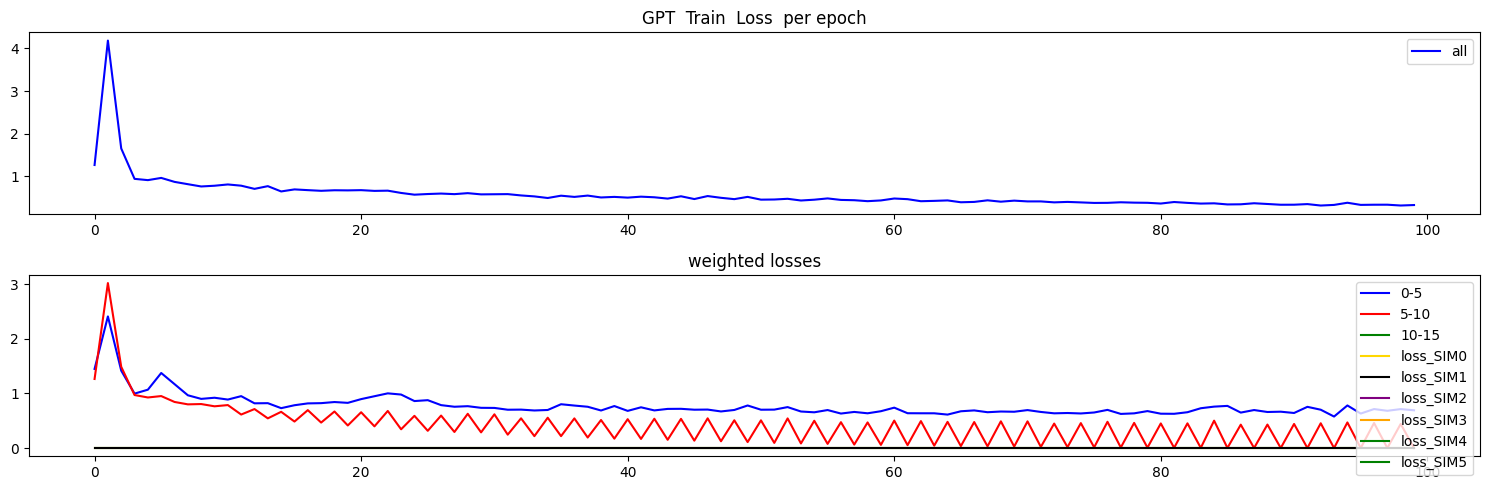

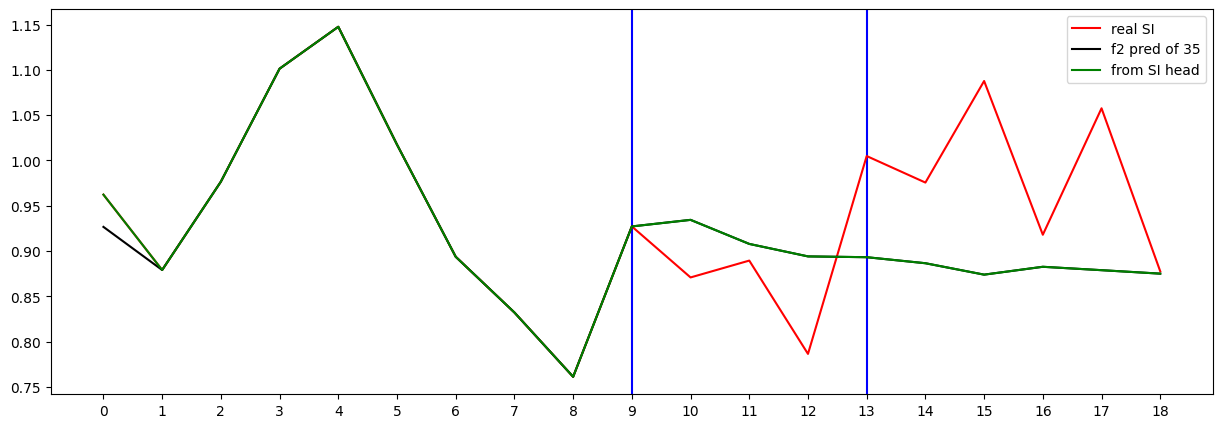

Testing R**2 - (all) - (no inputs):  0.9983641706569693
Testing R**2 - (f2) - SI full (no inputs):  -0.6395108210025908
Testing R**2 - SI head only (no inputs):  -0.6395108210025908
0 ...index R**2 (no inputs):  -0.018602240008490423
1 ...index R**2 (no inputs):  -0.25291934833039886
2 ...index R**2 (no inputs):  -0.6395108210025908
3 ...index R**2 (no inputs):  -0.9259628113172615
4 ...index R**2 (no inputs):  -0.2286021261808977
5 ...index R**2 (no inputs):  -0.2610797408254939
6 ...index R**2 (no inputs):  -0.00796455832920584
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12970699673345076
10 ...index R**2 (no inputs):  -0.011521703917674264
11 ...index R**2 (no inputs):  -503.2313708101417
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2792159372523162
16 ...index R**2 (no inputs):  0.12781698519019746
17 ...index R**2 (no inputs):  -106

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.344966
Loss_SI: 1.3549522161483765 Loss_all: 1.3096386194229126
===


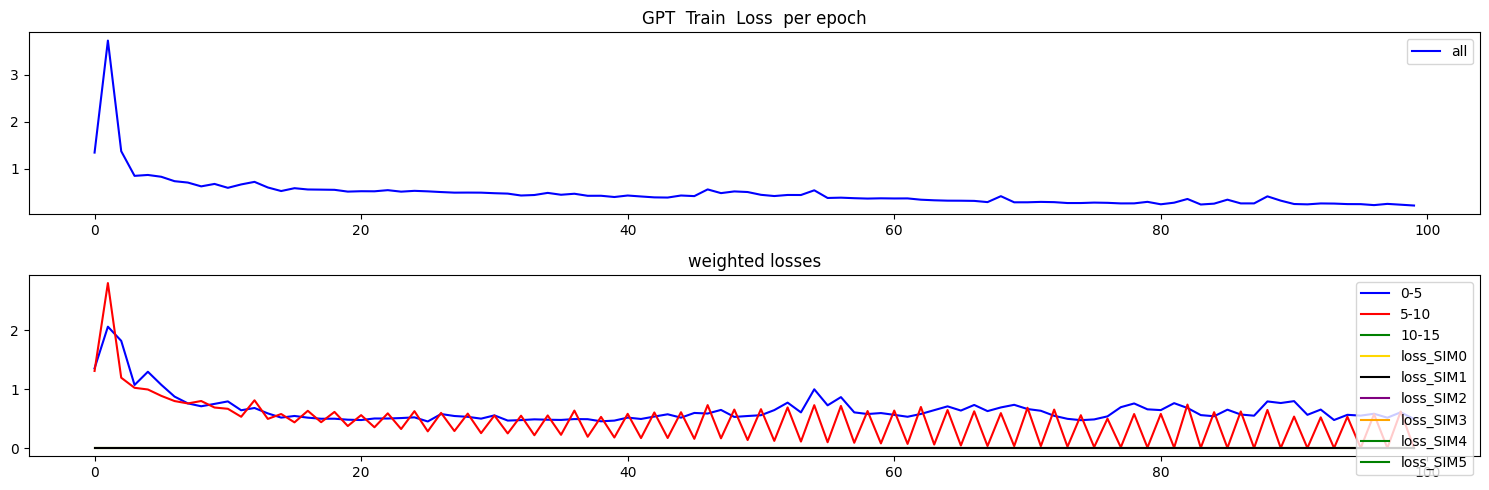

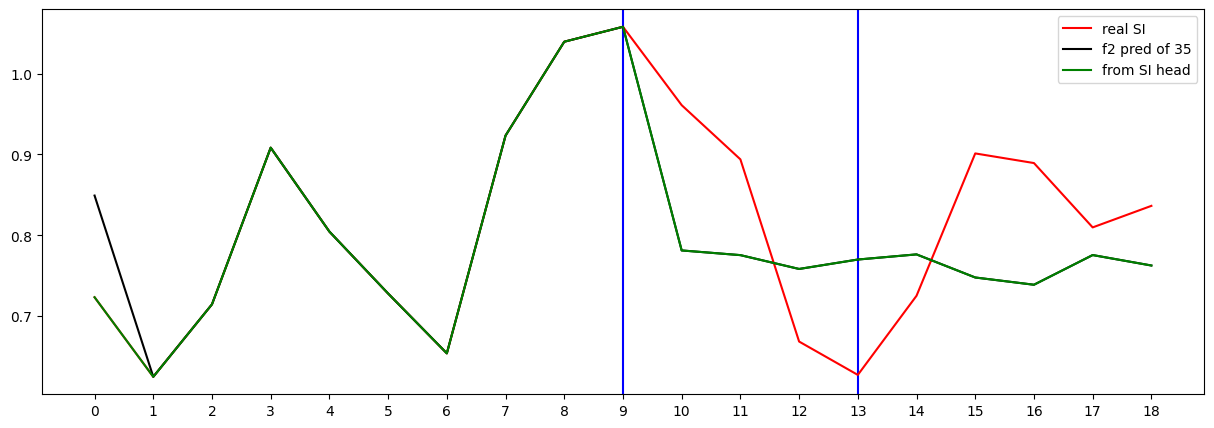

Testing R**2 - (all) - (no inputs):  0.9923855886927841
Testing R**2 - (f2) - SI full (no inputs):  -0.04567671625994607
Testing R**2 - SI head only (no inputs):  -0.04567671625994607
0 ...index R**2 (no inputs):  -0.9052037367093495
1 ...index R**2 (no inputs):  -0.7928115243013907
2 ...index R**2 (no inputs):  -0.04567671625994607
3 ...index R**2 (no inputs):  -15.193725825913393
4 ...index R**2 (no inputs):  -2.1738971951634274
5 ...index R**2 (no inputs):  -0.5568503231648947
6 ...index R**2 (no inputs):  0.21229831506821084
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.43390923035272
10 ...index R**2 (no inputs):  -0.006266198924893773
11 ...index R**2 (no inputs):  -62.907515524439745
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4014585021064496
16 ...index R**2 (no inputs):  0.007102038882883854
17 ...index R**2 (no inputs):  -39.75

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.322439
Loss_SI: 1.4625364542007446 Loss_all: 1.2767728567123413
===


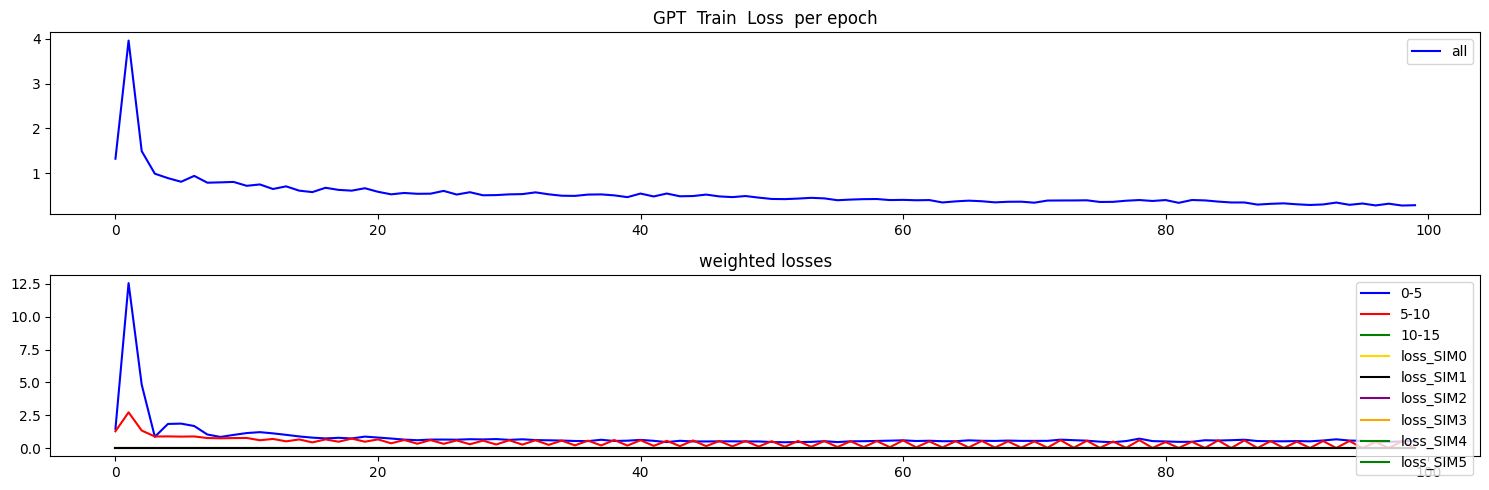

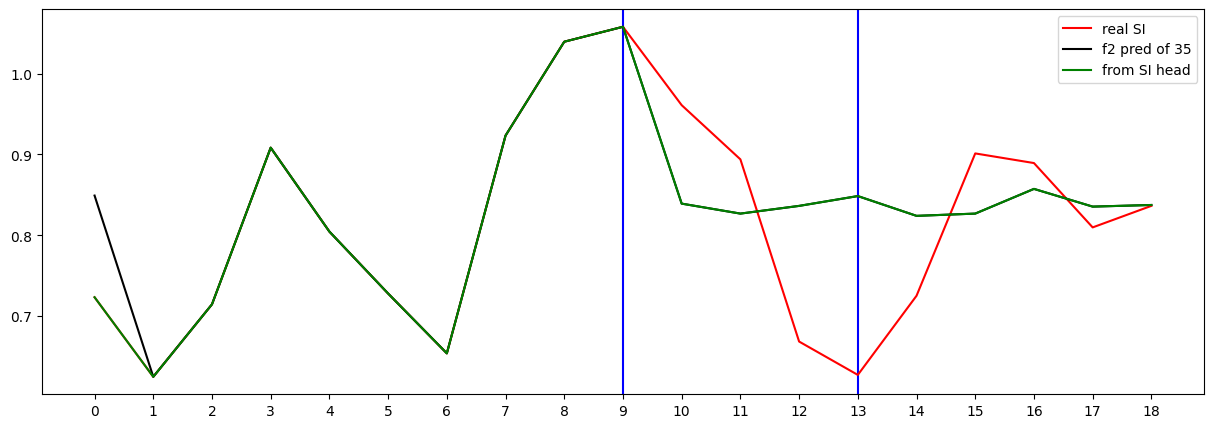

Testing R**2 - (all) - (no inputs):  0.9845550729379444
Testing R**2 - (f2) - SI full (no inputs):  -0.3142365438376482
Testing R**2 - SI head only (no inputs):  -0.3142365438376482
0 ...index R**2 (no inputs):  -0.2105091340336096
1 ...index R**2 (no inputs):  -0.4931025488009837
2 ...index R**2 (no inputs):  -0.3142365438376482
3 ...index R**2 (no inputs):  -13.526571992181093
4 ...index R**2 (no inputs):  -12.418388591921923
5 ...index R**2 (no inputs):  -2.1629310371245603
6 ...index R**2 (no inputs):  -28.51967764743568
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0671534585131046
10 ...index R**2 (no inputs):  0.031618906444440986
11 ...index R**2 (no inputs):  -59.81325669308389
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.892158314836119
16 ...index R**2 (no inputs):  -0.03233580893541643
17 ...index R**2 (no inputs):  -59.0651505

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.363063
Loss_SI: 1.6085712909698486 Loss_all: 1.308695912361145
===


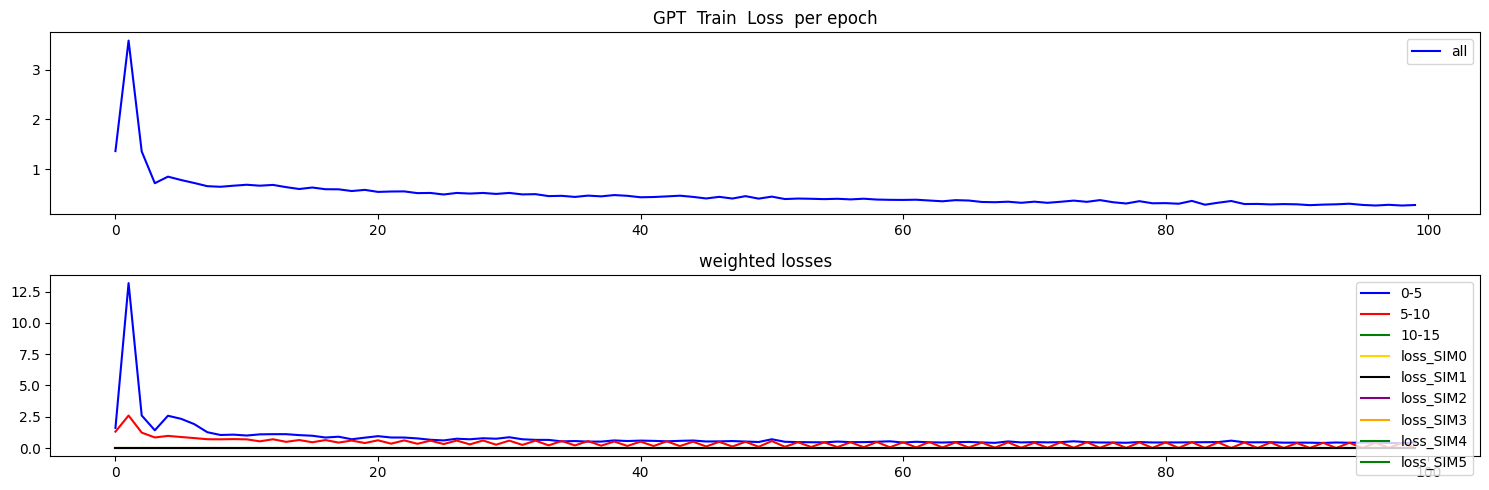

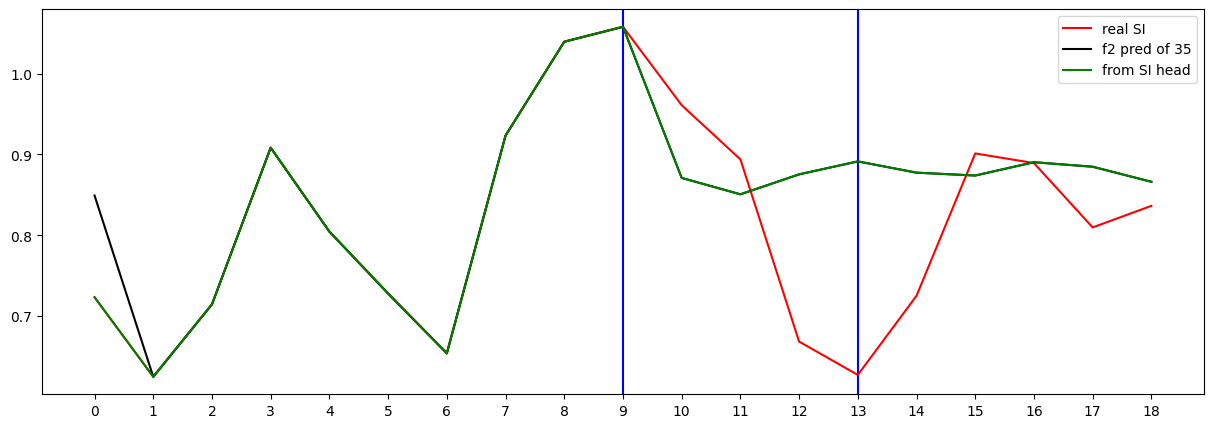

Testing R**2 - (all) - (no inputs):  0.9935333002919748
Testing R**2 - (f2) - SI full (no inputs):  -0.7921378592818706
Testing R**2 - SI head only (no inputs):  -0.7921378592818706
0 ...index R**2 (no inputs):  -0.31245253228839176
1 ...index R**2 (no inputs):  -0.17022658326419604
2 ...index R**2 (no inputs):  -0.7921378592818706
3 ...index R**2 (no inputs):  -79.31112168480703
4 ...index R**2 (no inputs):  -112.57367863516549
5 ...index R**2 (no inputs):  -0.3119359261939545
6 ...index R**2 (no inputs):  -43.23766759251299
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.166036427865749
10 ...index R**2 (no inputs):  -0.024415727825002786
11 ...index R**2 (no inputs):  -19.74780822914553
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6655572088482731
16 ...index R**2 (no inputs):  0.04500542167793087
17 ...index R**2 (no inputs):  -381.21569

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.302076
Loss_SI: 1.2576580047607422 Loss_all: 1.2307322025299072
===


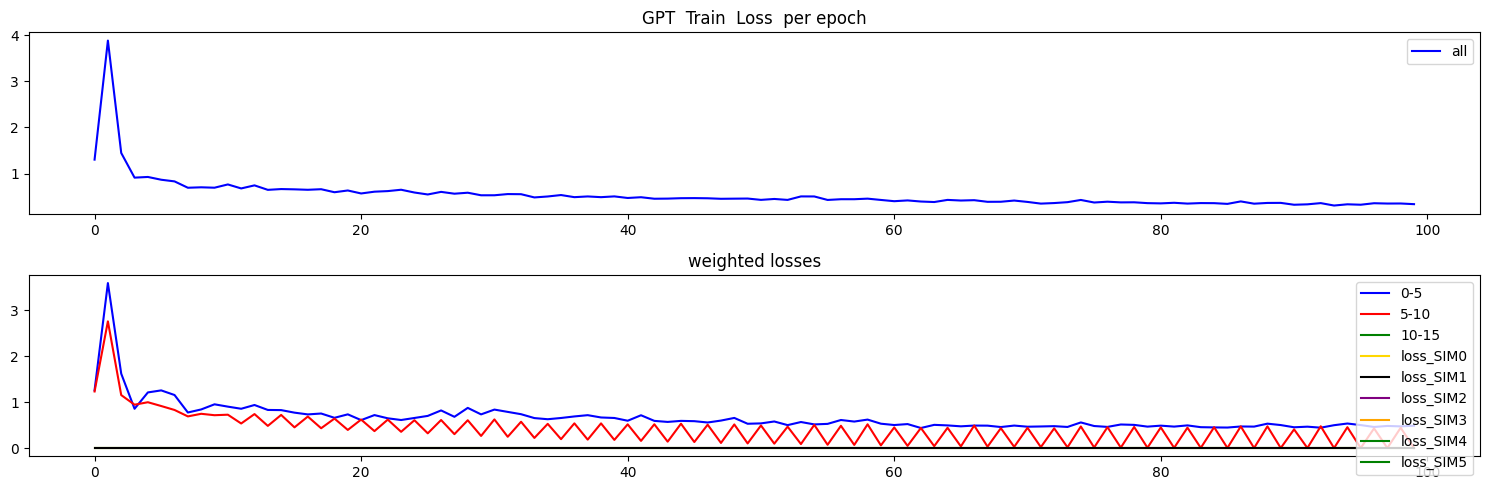

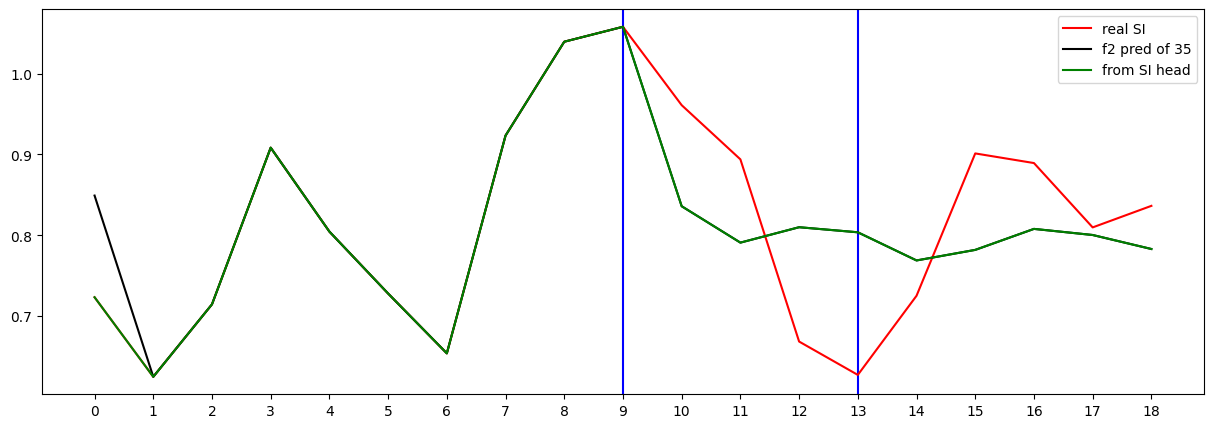

Testing R**2 - (all) - (no inputs):  0.994032354768257
Testing R**2 - (f2) - SI full (no inputs):  -0.07597661731717764
Testing R**2 - SI head only (no inputs):  -0.07597661731717764
0 ...index R**2 (no inputs):  -0.07367950606036855
1 ...index R**2 (no inputs):  -1.2006877309145483
2 ...index R**2 (no inputs):  -0.07597661731717764
3 ...index R**2 (no inputs):  -5.158775937837478
4 ...index R**2 (no inputs):  -22.27394925550925
5 ...index R**2 (no inputs):  -0.21100097937373108
6 ...index R**2 (no inputs):  -27.897101817843907
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.233684060589387
10 ...index R**2 (no inputs):  0.024699308132058673
11 ...index R**2 (no inputs):  -33.8832958174243
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.46674171838174794
16 ...index R**2 (no inputs):  -0.13686772727866936
17 ...index R**2 (no inputs):  -8.12907

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.133836
Loss_SI: 0.9020705223083496 Loss_all: 1.1261190176010132
===


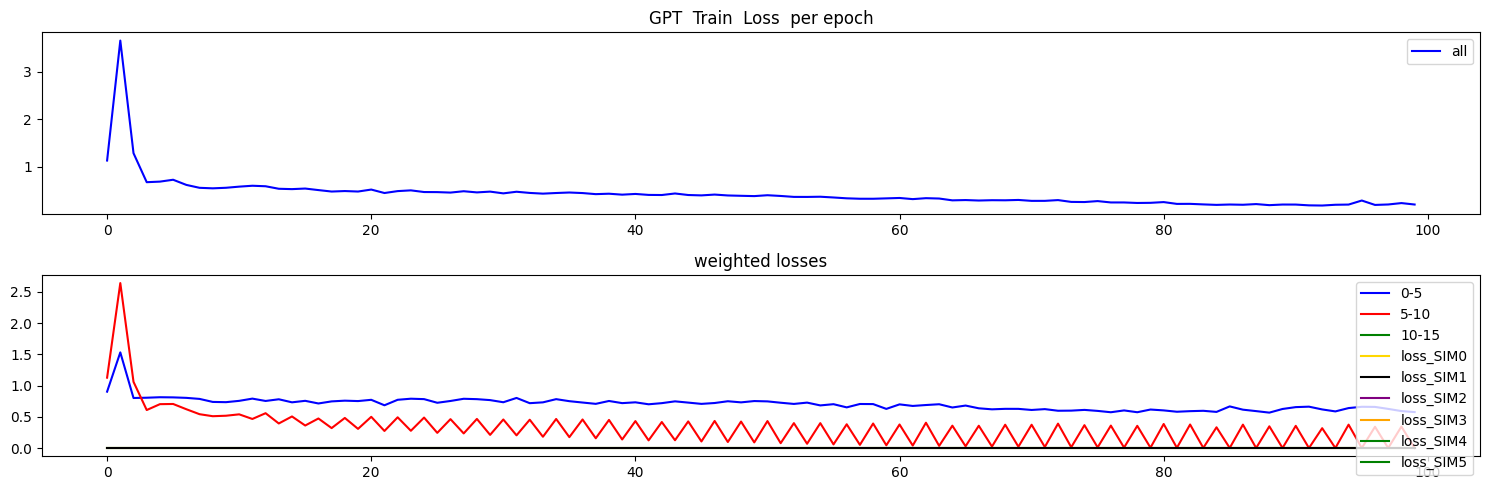

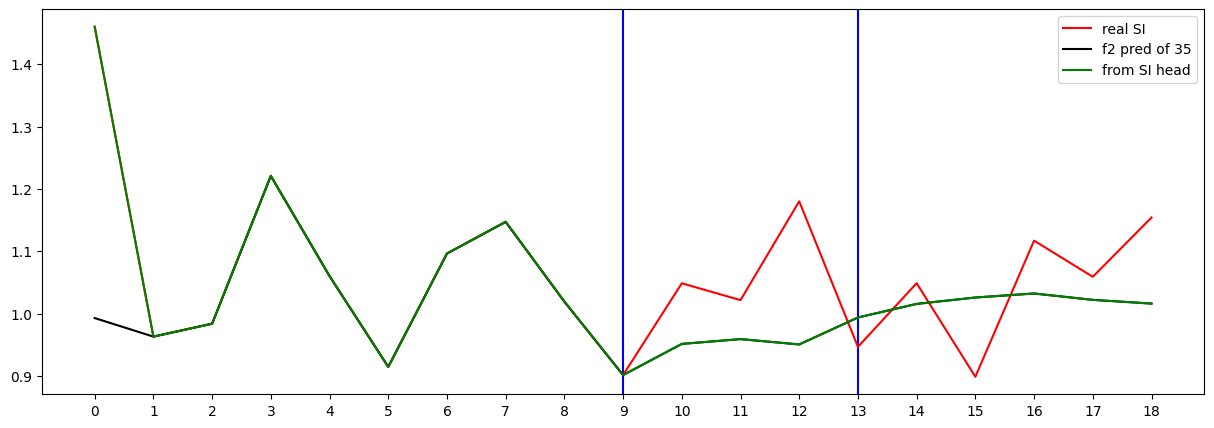

Testing R**2 - (all) - (no inputs):  0.9992772911649536
Testing R**2 - (f2) - SI full (no inputs):  -0.37579490433341944
Testing R**2 - SI head only (no inputs):  -0.37579490433341944
0 ...index R**2 (no inputs):  0.04724020869215406
1 ...index R**2 (no inputs):  -0.011617856850825392
2 ...index R**2 (no inputs):  -0.37579490433341944
3 ...index R**2 (no inputs):  -0.5101723699430489
4 ...index R**2 (no inputs):  -6.868703917315166
5 ...index R**2 (no inputs):  -20.837224620922857
6 ...index R**2 (no inputs):  -113.28460606779343
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8475933629928465
10 ...index R**2 (no inputs):  -1.8280338785337804
11 ...index R**2 (no inputs):  -71.28870579404318
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.545320933806268
16 ...index R**2 (no inputs):  -1.0100722036146306
17 ...index R**2 (no inputs):  -139.687

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.274870
Loss_SI: 1.1453860998153687 Loss_all: 1.2218047380447388
===


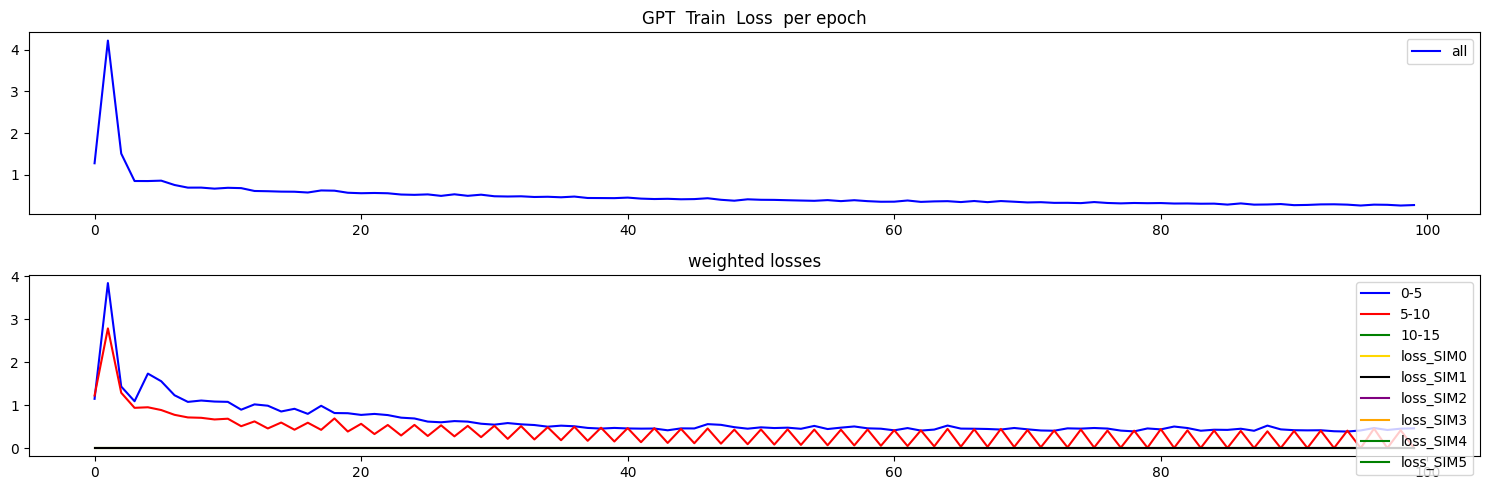

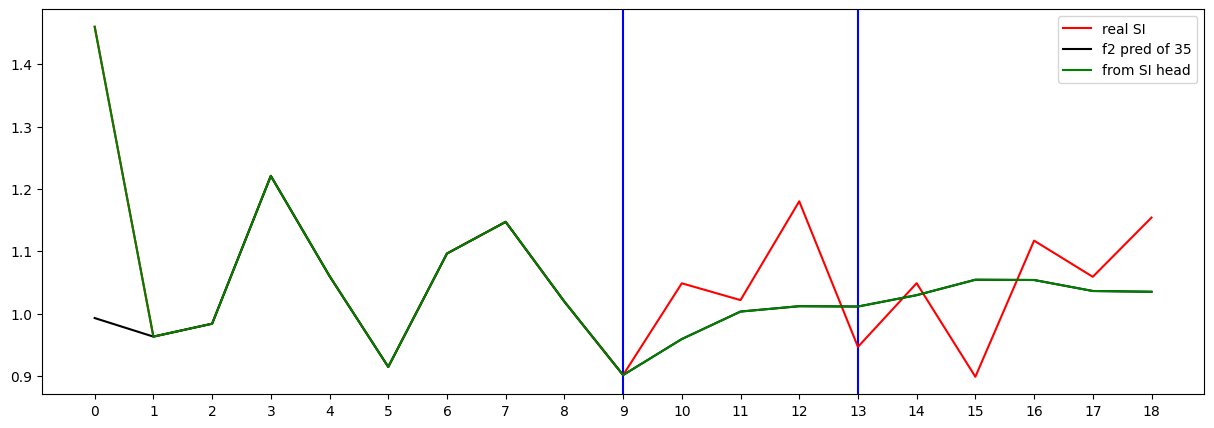

Testing R**2 - (all) - (no inputs):  0.9958442420512617
Testing R**2 - (f2) - SI full (no inputs):  -0.19981132894903664
Testing R**2 - SI head only (no inputs):  -0.19981132894903664
0 ...index R**2 (no inputs):  -0.05917701098578987
1 ...index R**2 (no inputs):  -0.19658536578559027
2 ...index R**2 (no inputs):  -0.19981132894903664
3 ...index R**2 (no inputs):  -46.26184818953908
4 ...index R**2 (no inputs):  -40.99644211307331
5 ...index R**2 (no inputs):  -140.15590658061183
6 ...index R**2 (no inputs):  -260.0154629079252
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5454584528698954
10 ...index R**2 (no inputs):  0.2140589422037813
11 ...index R**2 (no inputs):  -149.95404788535865
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.829389533672966
16 ...index R**2 (no inputs):  -0.7466666582028076
17 ...index R**2 (no inputs):  -180.5943

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.272052
Loss_SI: 1.2363381385803223 Loss_all: 1.206420660018921
===


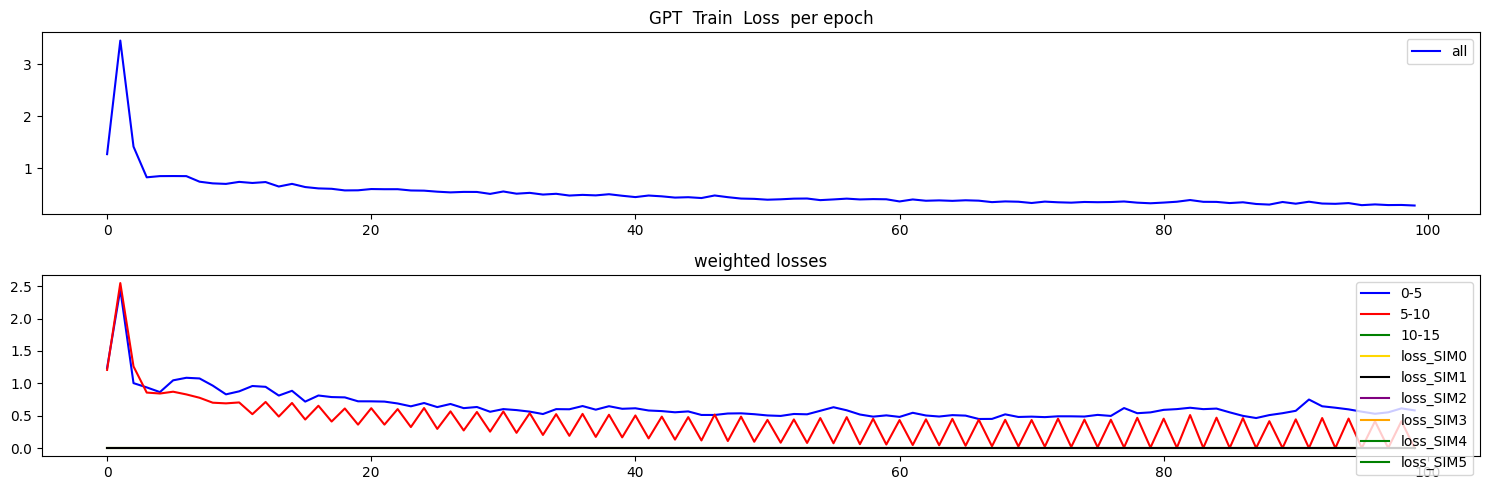

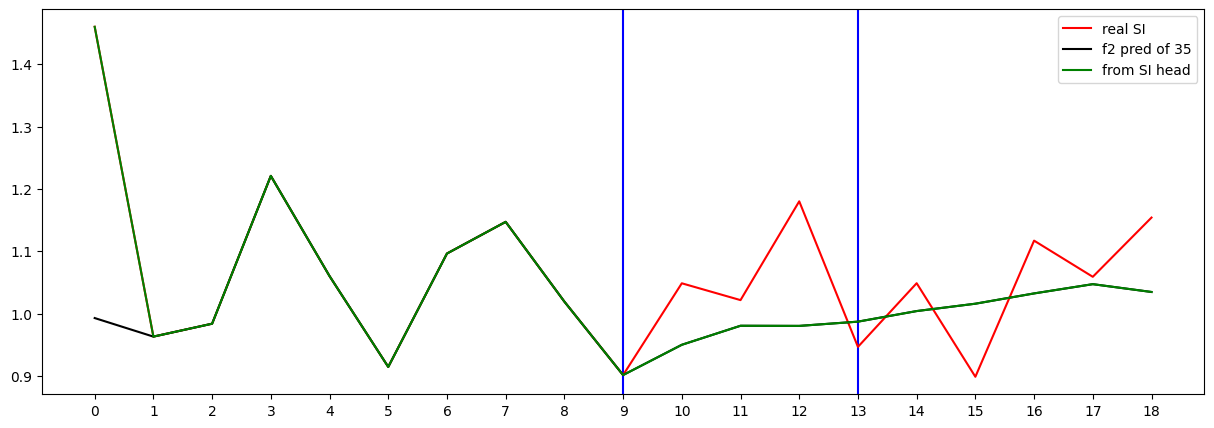

Testing R**2 - (all) - (no inputs):  0.9989006442284771
Testing R**2 - (f2) - SI full (no inputs):  -0.23656937010586065
Testing R**2 - SI head only (no inputs):  -0.23656937010586065
0 ...index R**2 (no inputs):  -0.08990603112739848
1 ...index R**2 (no inputs):  -0.08645744474150074
2 ...index R**2 (no inputs):  -0.23656937010586065
3 ...index R**2 (no inputs):  -19.076805585976107
4 ...index R**2 (no inputs):  -28.50568098514494
5 ...index R**2 (no inputs):  -33.573842418202496
6 ...index R**2 (no inputs):  -1016.9315391582572
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6489523425358761
10 ...index R**2 (no inputs):  0.03621123194808251
11 ...index R**2 (no inputs):  -41.808833404156225
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.0389914366448583
16 ...index R**2 (no inputs):  0.15932957393218616
17 ...index R**2 (no inputs):  -63.23

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.198761
Loss_SI: 1.2505075931549072 Loss_all: 1.222156047821045
===


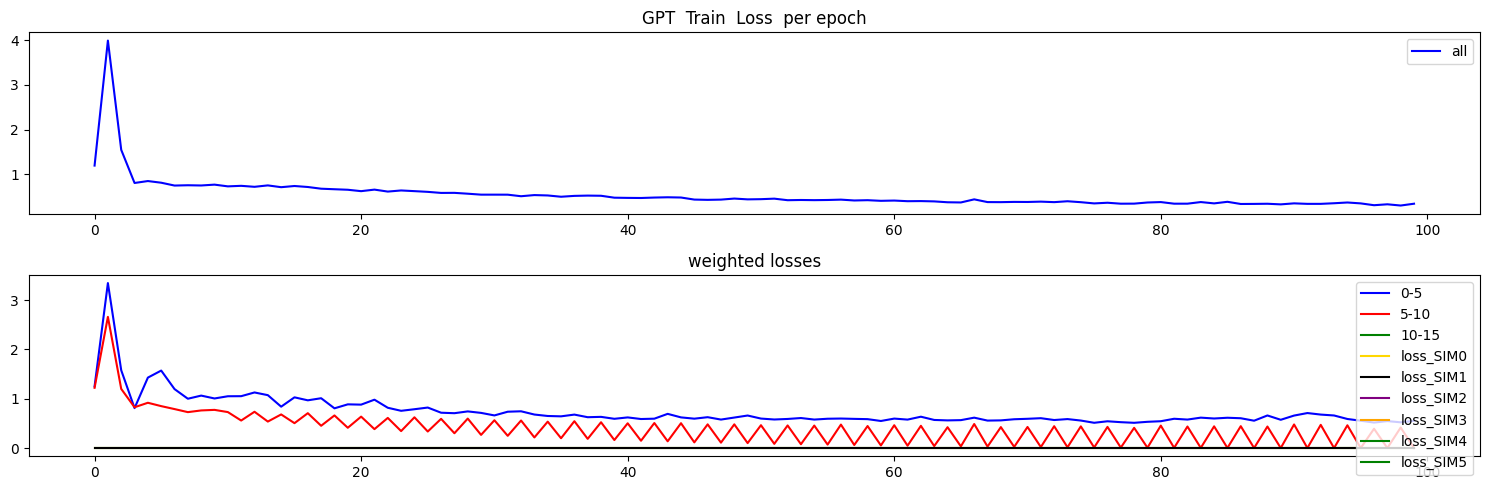

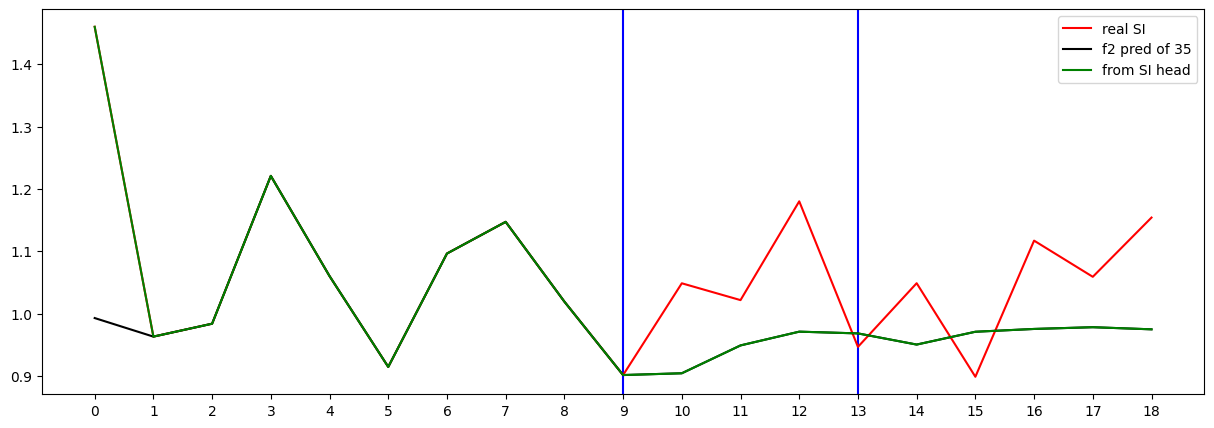

Testing R**2 - (all) - (no inputs):  0.989930682370772
Testing R**2 - (f2) - SI full (no inputs):  -0.7390365092199127
Testing R**2 - SI head only (no inputs):  -0.7390365092199127
0 ...index R**2 (no inputs):  -0.024490778192461926
1 ...index R**2 (no inputs):  -0.23568477373776053
2 ...index R**2 (no inputs):  -0.7390365092199127
3 ...index R**2 (no inputs):  -132.17868880202667
4 ...index R**2 (no inputs):  -3.942669979469006
5 ...index R**2 (no inputs):  -347.2134918057905
6 ...index R**2 (no inputs):  -381.22115832940113
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6516707210426005
10 ...index R**2 (no inputs):  0.19138421212096102
11 ...index R**2 (no inputs):  -73.1946725949519
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.29417187881082
16 ...index R**2 (no inputs):  -1.2252206299176756
17 ...index R**2 (no inputs):  -118.31016726

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.212107
Loss_SI: 0.9373607039451599 Loss_all: 1.1448540687561035
===


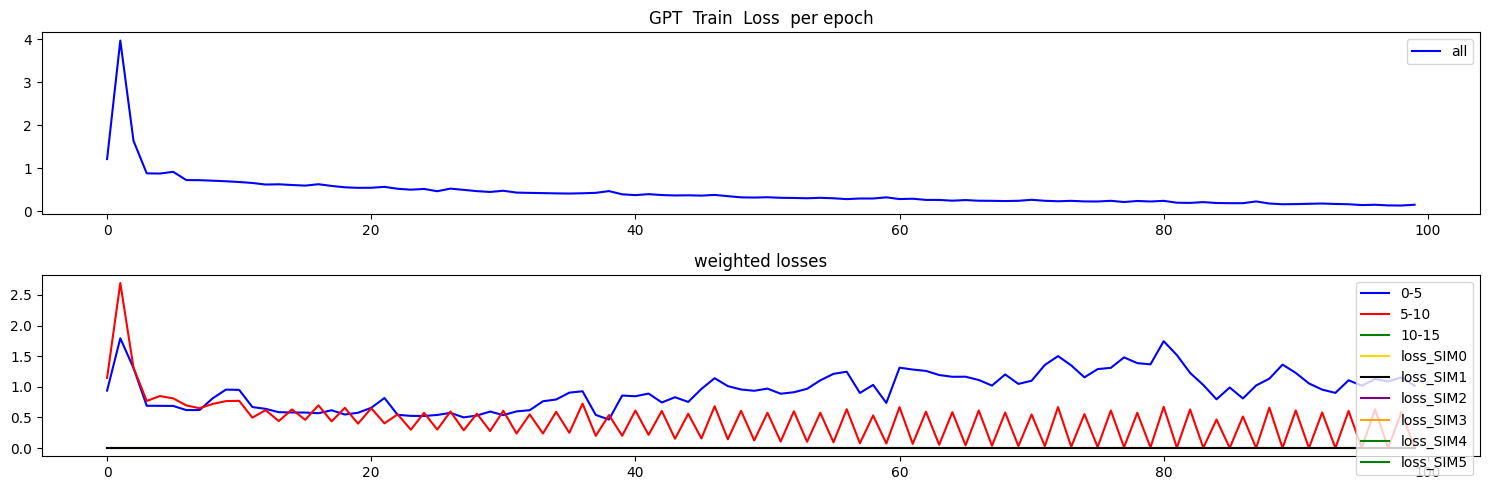

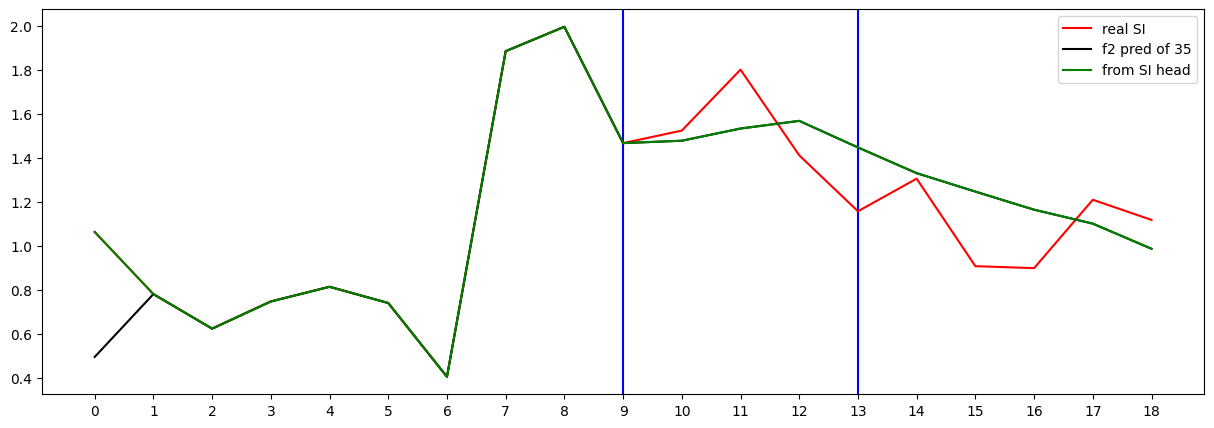

Testing R**2 - (all) - (no inputs):  0.6922332565412188
Testing R**2 - (f2) - SI full (no inputs):  0.006177050994105149
Testing R**2 - SI head only (no inputs):  0.006177050994105149
0 ...index R**2 (no inputs):  -0.5132131103737525
1 ...index R**2 (no inputs):  0.31712916182750783
2 ...index R**2 (no inputs):  0.006177050994105149
3 ...index R**2 (no inputs):  -0.7568700966815034
4 ...index R**2 (no inputs):  -0.8121222163802113
5 ...index R**2 (no inputs):  -0.32940376283551953
6 ...index R**2 (no inputs):  0.026380622242775376
7 ...index R**2 (no inputs):  -4.3185098494895575
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.59662630871237
10 ...index R**2 (no inputs):  0.1040998430675526
11 ...index R**2 (no inputs):  -103.38063770036928
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8265464821179194
16 ...index R**2 (no inputs):  -0.5753445164788005
17 ...index R**2 (no in

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.050309
Loss_SI: 1.0095760822296143 Loss_all: 1.092918038368225
===


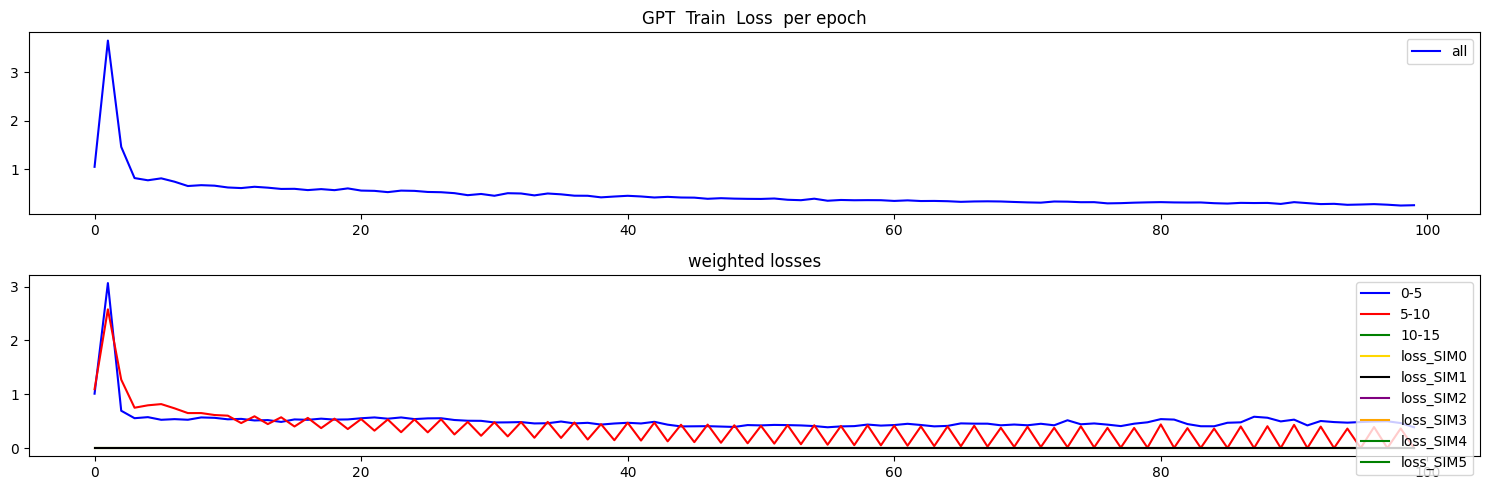

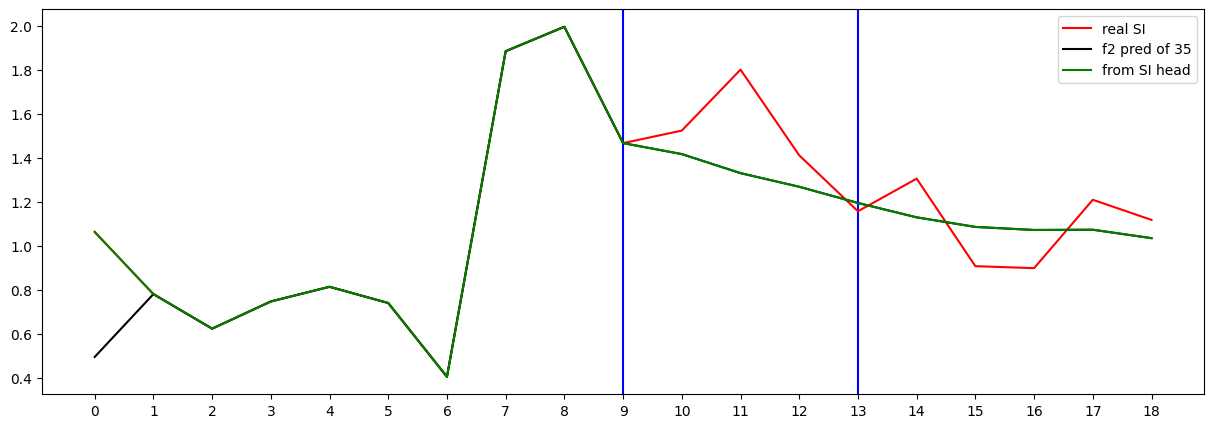

Testing R**2 - (all) - (no inputs):  0.6579718875268219
Testing R**2 - (f2) - SI full (no inputs):  0.541079549780882
Testing R**2 - SI head only (no inputs):  0.541079549780882
0 ...index R**2 (no inputs):  -0.060161835824348975
1 ...index R**2 (no inputs):  0.5910701029581503
2 ...index R**2 (no inputs):  0.541079549780882
3 ...index R**2 (no inputs):  -0.006943543310849121
4 ...index R**2 (no inputs):  -0.4104637008530809
5 ...index R**2 (no inputs):  -0.47620243454520406
6 ...index R**2 (no inputs):  -12.254667680771034
7 ...index R**2 (no inputs):  -3.283860530890119
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.739847201512292
10 ...index R**2 (no inputs):  -1.0064885450941934
11 ...index R**2 (no inputs):  -637.4791847322867
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.33788974500228197
16 ...index R**2 (no inputs):  -1.3074752280698942
17 ...index R**2 (no inputs):

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.282033
Loss_SI: 2.0634264945983887 Loss_all: 1.2967724800109863
===


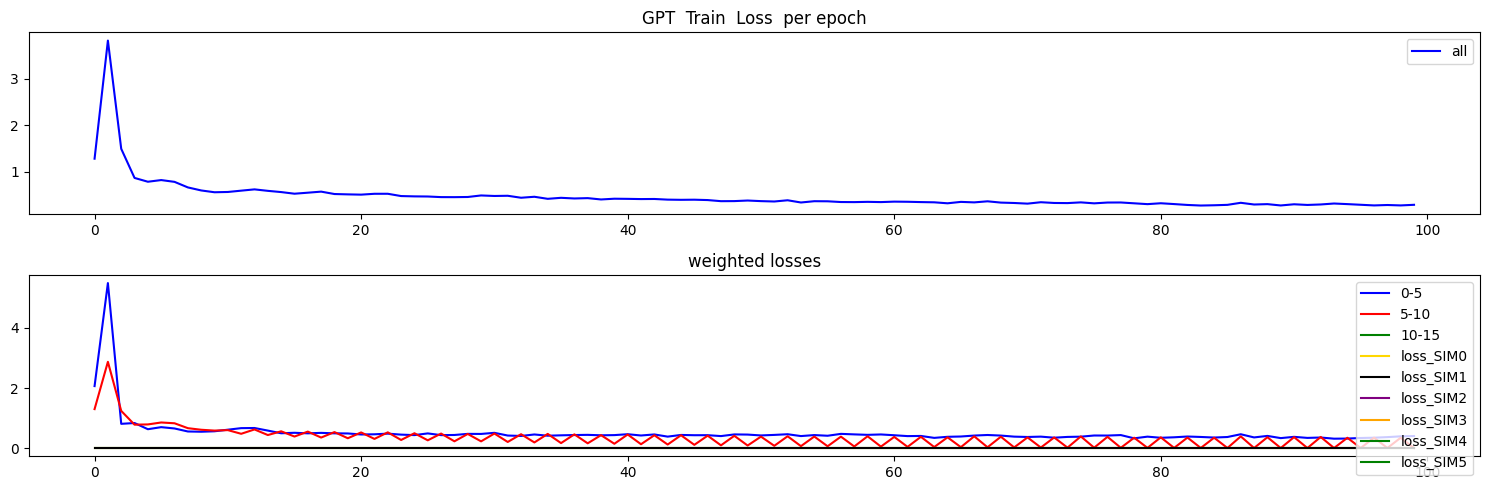

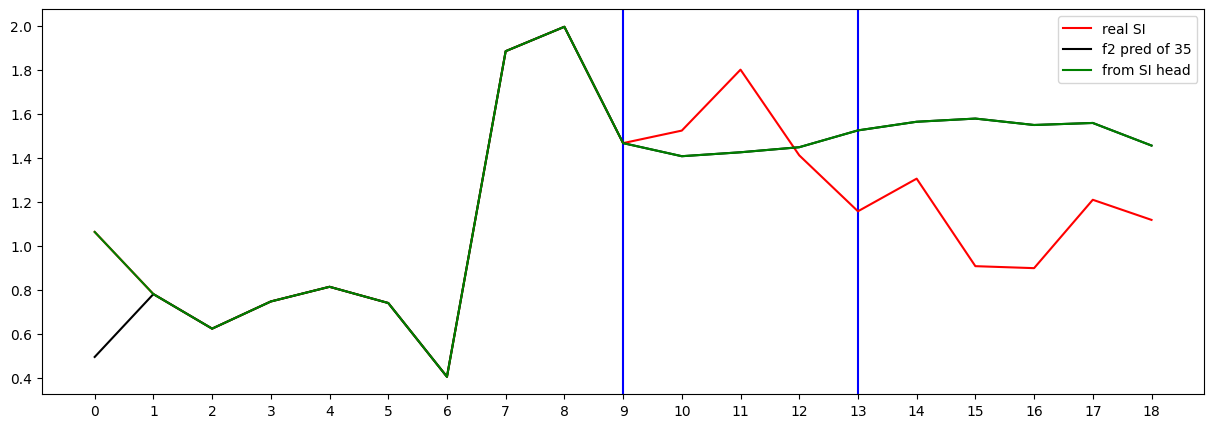

Testing R**2 - (all) - (no inputs):  0.5577348900337585
Testing R**2 - (f2) - SI full (no inputs):  -1.6529239896012307
Testing R**2 - SI head only (no inputs):  -1.6529239896012307
0 ...index R**2 (no inputs):  -0.04791414910954428
1 ...index R**2 (no inputs):  0.5067140548221
2 ...index R**2 (no inputs):  -1.6529239896012307
3 ...index R**2 (no inputs):  -3.709575825878056
4 ...index R**2 (no inputs):  -11.718859683538607
5 ...index R**2 (no inputs):  -0.9054986075791569
6 ...index R**2 (no inputs):  -1.9427152021693304
7 ...index R**2 (no inputs):  -1.3943822223713154
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1460512600335742
10 ...index R**2 (no inputs):  -0.10136854609890134
11 ...index R**2 (no inputs):  -581.2801824549153
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4979419478377083
16 ...index R**2 (no inputs):  -0.16452127860129995
17 ...index R**2 (no inputs)

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.265955
Loss_SI: 1.3290256261825562 Loss_all: 1.284716248512268
===


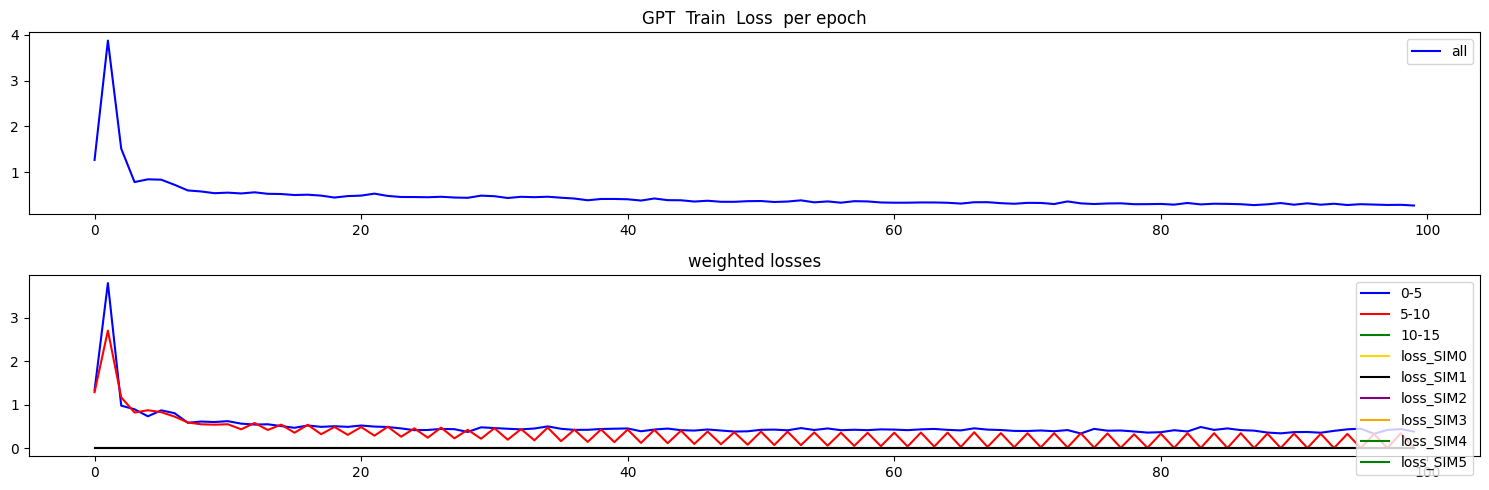

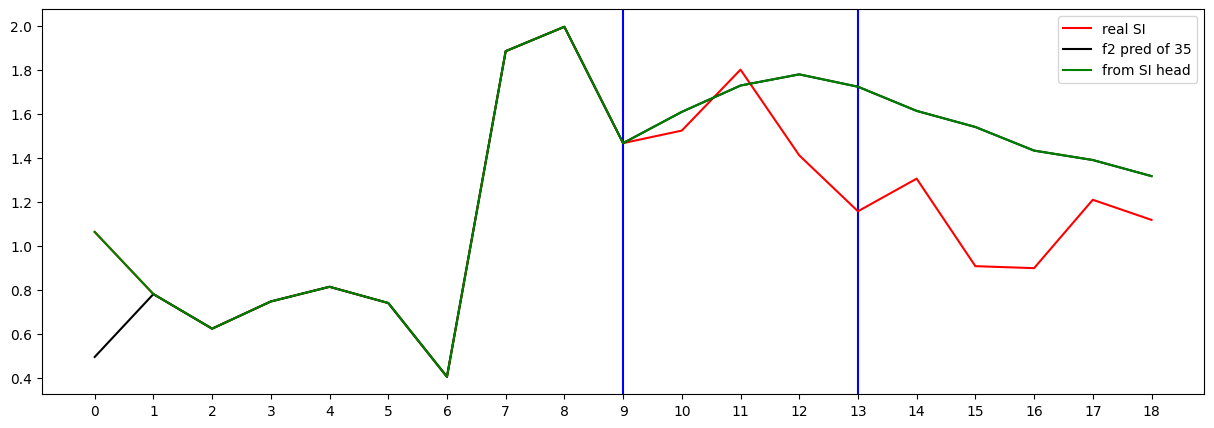

Testing R**2 - (all) - (no inputs):  0.7131729051250392
Testing R**2 - (f2) - SI full (no inputs):  -1.899441570201164
Testing R**2 - SI head only (no inputs):  -1.899441570201164
0 ...index R**2 (no inputs):  0.015092580910203934
1 ...index R**2 (no inputs):  0.36456627621772186
2 ...index R**2 (no inputs):  -1.899441570201164
3 ...index R**2 (no inputs):  -1.0915991224925032
4 ...index R**2 (no inputs):  -14.926496817631602
5 ...index R**2 (no inputs):  -0.23219139350751017
6 ...index R**2 (no inputs):  -4.581644387470333
7 ...index R**2 (no inputs):  -4.092366407345904
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3551167466503622
10 ...index R**2 (no inputs):  -0.6184422568726418
11 ...index R**2 (no inputs):  -25.901917138481885
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.628617305834502
16 ...index R**2 (no inputs):  -0.6563489818768942
17 ...index R**2 (no inputs):

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.211402
Loss_SI: 1.1296595335006714 Loss_all: 1.2151333093643188
===


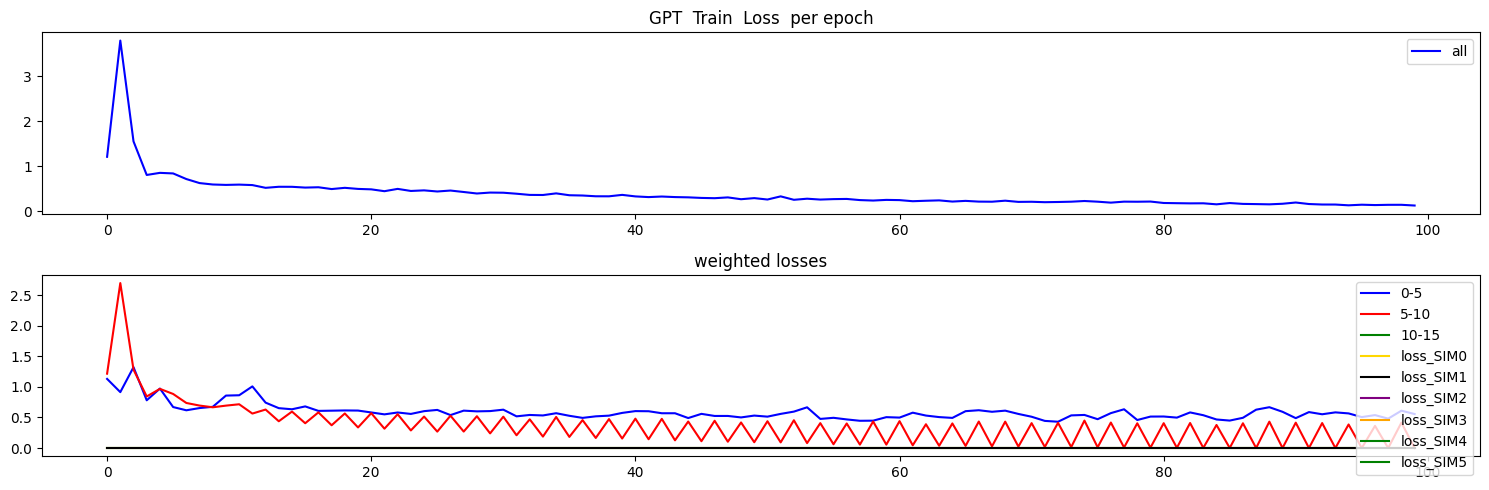

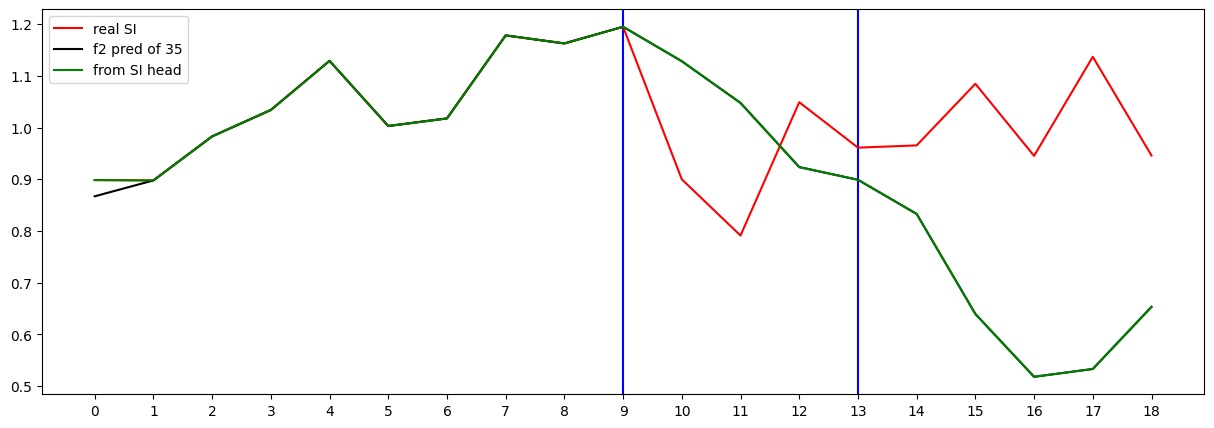

Testing R**2 - (all) - (no inputs):  0.9534443765409429
Testing R**2 - (f2) - SI full (no inputs):  -9.424003083354572
Testing R**2 - SI head only (no inputs):  -9.424003083354572
0 ...index R**2 (no inputs):  -0.26417352309251774
1 ...index R**2 (no inputs):  -10.40781163118426
2 ...index R**2 (no inputs):  -9.424003083354572
3 ...index R**2 (no inputs):  -18.647169720524694
4 ...index R**2 (no inputs):  -229.16831434438336
5 ...index R**2 (no inputs):  -13.355513050252473
6 ...index R**2 (no inputs):  -57.30737699133348
7 ...index R**2 (no inputs):  -107.99049429688715
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04633266065013242
10 ...index R**2 (no inputs):  -1.7278354198483554
11 ...index R**2 (no inputs):  -5.406160602810392
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -21.162776230125203
16 ...index R**2 (no inputs):  -6.205289565380251
17 ...index R**2 (no inputs): 

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.245151
Loss_SI: 1.321110725402832 Loss_all: 1.2592949867248535
===


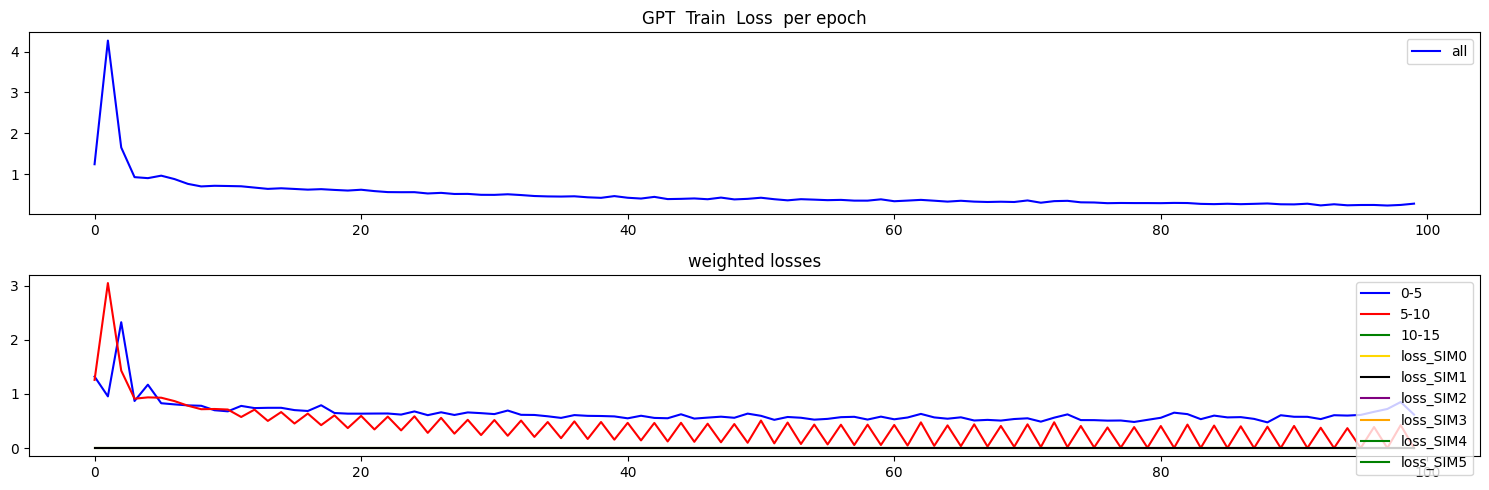

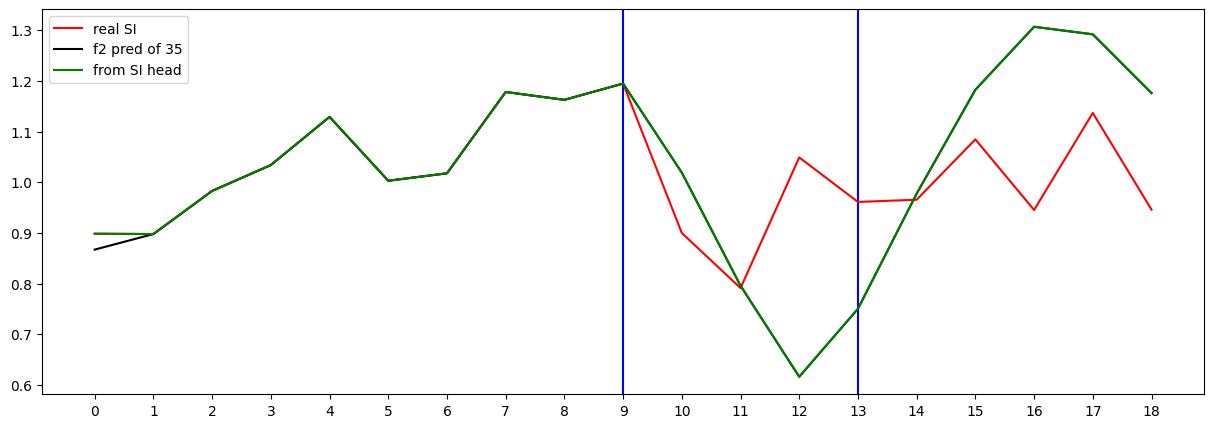

Testing R**2 - (all) - (no inputs):  0.865026789581312
Testing R**2 - (f2) - SI full (no inputs):  -5.737887036226383
Testing R**2 - SI head only (no inputs):  -5.737887036226383
0 ...index R**2 (no inputs):  -0.6211518908724034
1 ...index R**2 (no inputs):  -7.467251067219292
2 ...index R**2 (no inputs):  -5.737887036226383
3 ...index R**2 (no inputs):  -9.27553999466256
4 ...index R**2 (no inputs):  -2568.728951289678
5 ...index R**2 (no inputs):  -40.89082396977226
6 ...index R**2 (no inputs):  -2811.2300380445754
7 ...index R**2 (no inputs):  -4265.224566598004
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7453827847756973
10 ...index R**2 (no inputs):  0.09692508395460475
11 ...index R**2 (no inputs):  -48.967618256324805
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -42.59185923691154
16 ...index R**2 (no inputs):  -7.215814300572736
17 ...index R**2 (no inputs):  -260.9

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.351963
Loss_SI: 1.657884955406189 Loss_all: 1.292623519897461
===


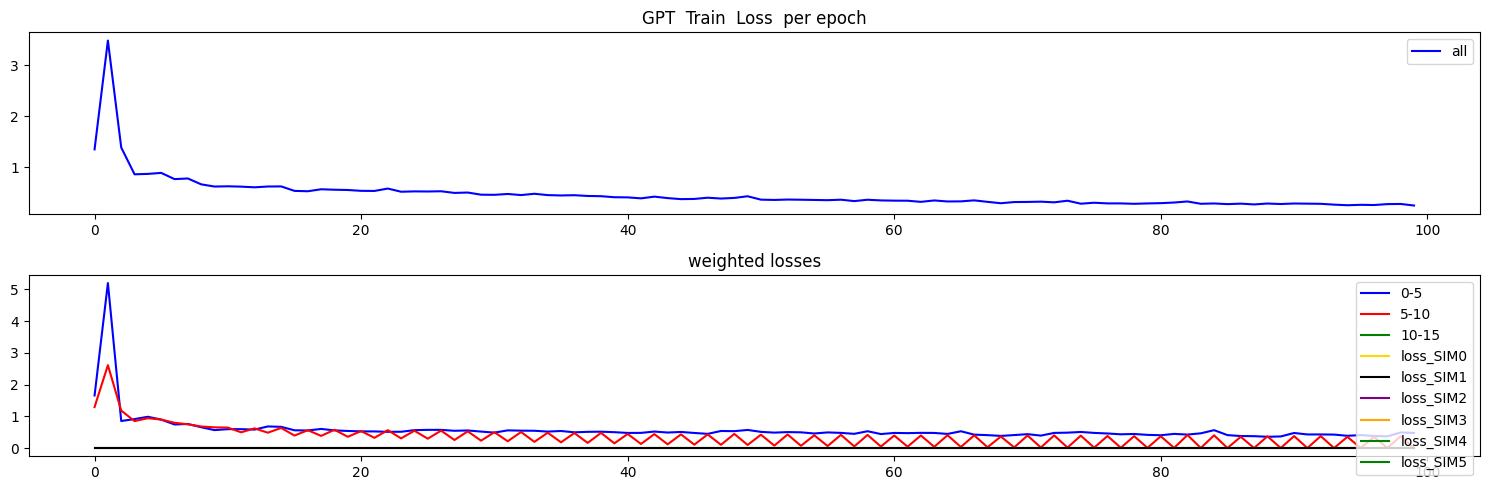

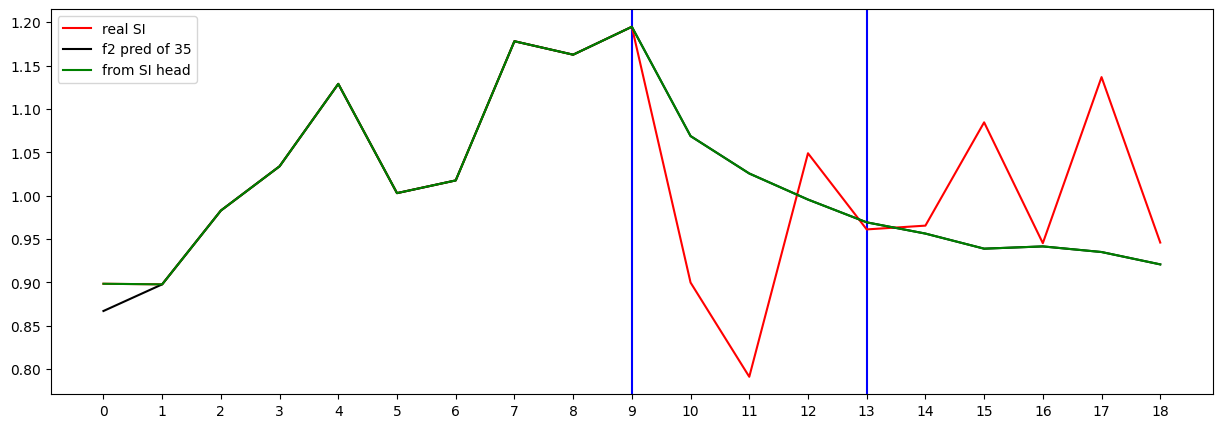

Testing R**2 - (all) - (no inputs):  0.9710871217412959
Testing R**2 - (f2) - SI full (no inputs):  -0.5712305397187734
Testing R**2 - SI head only (no inputs):  -0.5712305397187734
0 ...index R**2 (no inputs):  0.02516620715171236
1 ...index R**2 (no inputs):  -0.5473985743819922
2 ...index R**2 (no inputs):  -0.5712305397187734
3 ...index R**2 (no inputs):  -1.6800650711637148
4 ...index R**2 (no inputs):  -86.50548218378754
5 ...index R**2 (no inputs):  -7.8536515348250955
6 ...index R**2 (no inputs):  -340.0763430738439
7 ...index R**2 (no inputs):  -44.01724169399256
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02332560011005924
10 ...index R**2 (no inputs):  -0.1519106914718933
11 ...index R**2 (no inputs):  -28.147508235983672
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.215935926702578
16 ...index R**2 (no inputs):  -0.3048987571946682
17 ...index R**2 (no inputs)

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.375765
Loss_SI: 1.1518402099609375 Loss_all: 1.3399741649627686
===


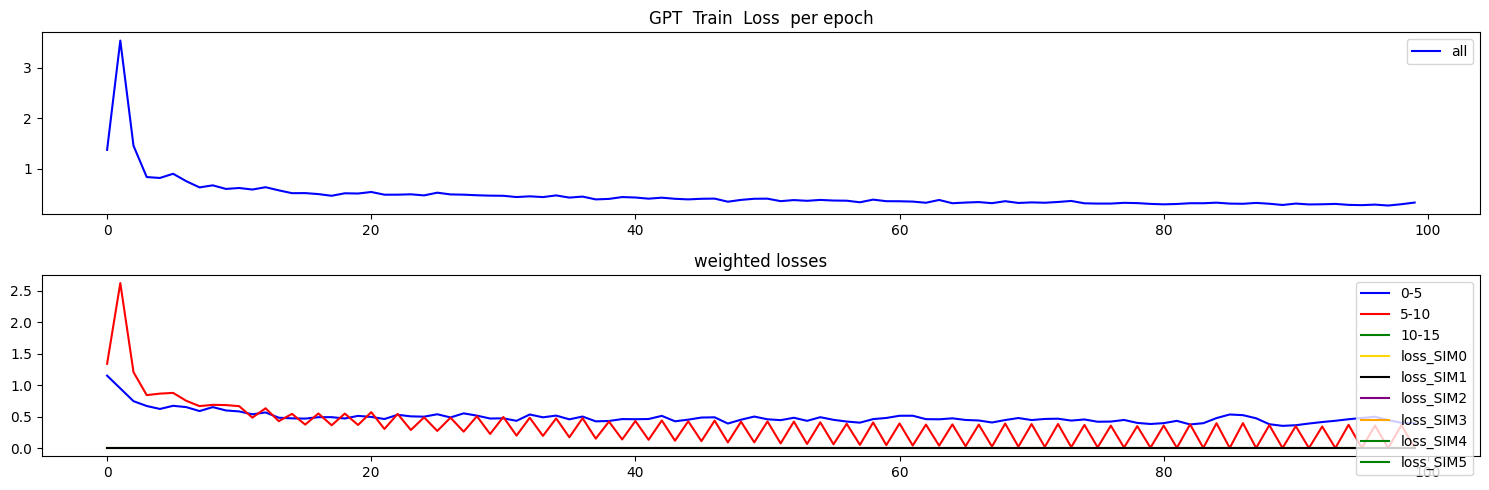

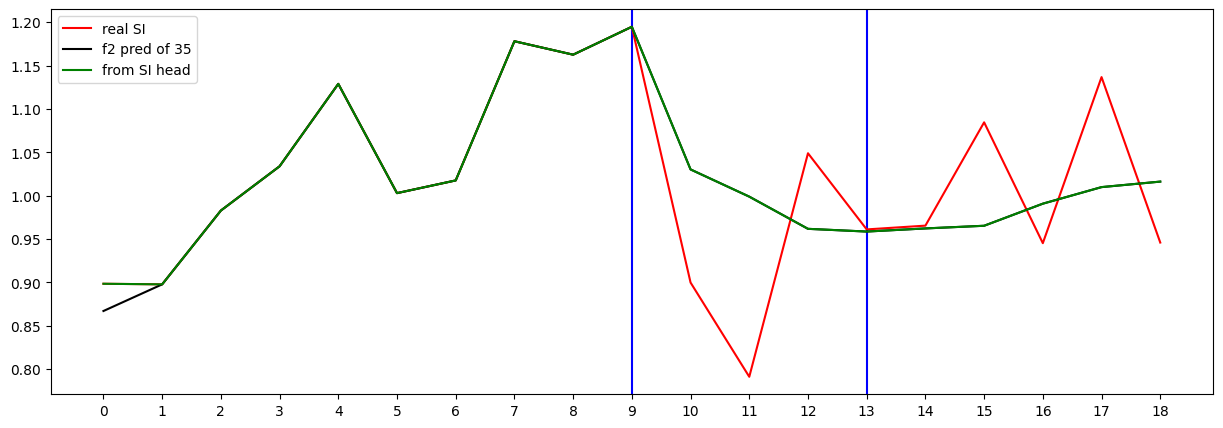

Testing R**2 - (all) - (no inputs):  0.975048011149848
Testing R**2 - (f2) - SI full (no inputs):  -0.3406158338703418
Testing R**2 - SI head only (no inputs):  -0.3406158338703418
0 ...index R**2 (no inputs):  -0.032534473338732495
1 ...index R**2 (no inputs):  -0.646826398266692
2 ...index R**2 (no inputs):  -0.3406158338703418
3 ...index R**2 (no inputs):  -0.14536812967134827
4 ...index R**2 (no inputs):  -36.417296891808775
5 ...index R**2 (no inputs):  -6.618525806654091
6 ...index R**2 (no inputs):  -108.3497092135238
7 ...index R**2 (no inputs):  -13.040034252248857
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06637540683525911
10 ...index R**2 (no inputs):  -0.11339510349977844
11 ...index R**2 (no inputs):  -5.140561498002135
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.307675820894158
16 ...index R**2 (no inputs):  -0.05104940728802476
17 ...index R**2 (no inp

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.03748525448458584


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.20175374844929017


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.13357723624862583


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.23809031218668553



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.6022347344301963
Naive_R2:....................................R²: 0.8253
RMSE:0.2191,MAE:0.1872,MASE:0.4760
1 .......................R² on just step n - R²: 0.6022347344301963
Naive_R2:....................................R²: 0.8253
RMSE:0.2191,MAE:0.1872,MASE:0.4760
2 .....................R² on first n steps - R²: 0.6317400990777098
Naive_R2:....................................R²: 0.6644
RMSE:0.1843,MAE:0.1558,MASE:0.5948
2 .......................R² on just step n - R²: 0.6824087684671218
Naive_R2:....................................R²: 0.7455
RMSE:0.1411,MAE:0.1243,MASE:0.4736
3 .....................R² on first n steps - R²: 0.529947886857667
Naive_R2:....................................R²: 0.6327
RMSE:0.1845,MAE:0.1467,MASE:0.5831
3 .......................R² on just step n - R²: -0.08181502644761807
Naive_R2:....................................R²: 0.4162
RMSE:0.1849,MAE:0.1284,MASE:0.5103
4 .....................R² on first n steps - 

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.6705742640453979
Naive_R2:....................................R²: 0.8553
RMSE:0.1994,MAE:0.1545,MASE:0.3929
1 .......................R² on just step n - R²: 0.6705742640453979
Naive_R2:....................................R²: 0.8553
RMSE:0.1994,MAE:0.1545,MASE:0.3929
2 .....................R² on first n steps - R²: 0.6506139716261189
Naive_R2:....................................R²: 0.6816
RMSE:0.1795,MAE:0.1492,MASE:0.5696
2 .......................R² on just step n - R²: 0.6063601499661939
Naive_R2:....................................R²: 0.6845
RMSE:0.1571,MAE:0.1438,MASE:0.5478
3 .....................R² on first n steps - R²: 0.48461775157034914
Naive_R2:....................................R²: 0.5973
RMSE:0.1932,MAE:0.1614,MASE:0.6416
3 .......................R² on just step n - R²: -0.5036592095964807
Naive_R2:....................................R²: 0.1886
RMSE:0.2180,MAE:0.1858,MASE:0.7383
4 .....................R² on first n steps -

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.6231119922889186
Naive_R2:....................................R²: 0.8344
RMSE:0.2133,MAE:0.1593,MASE:0.4049
1 .......................R² on just step n - R²: 0.6231119922889186
Naive_R2:....................................R²: 0.8344
RMSE:0.2133,MAE:0.1593,MASE:0.4049
2 .....................R² on first n steps - R²: 0.6587938527866763
Naive_R2:....................................R²: 0.6891
RMSE:0.1774,MAE:0.1353,MASE:0.5165
2 .......................R² on just step n - R²: 0.7218051976175104
Naive_R2:....................................R²: 0.7770
RMSE:0.1321,MAE:0.1113,MASE:0.4238
3 .....................R² on first n steps - R²: 0.5669629398359702
Naive_R2:....................................R²: 0.6616
RMSE:0.1771,MAE:0.1387,MASE:0.5515
3 .......................R² on just step n - R²: 0.01473237708502051
Naive_R2:....................................R²: 0.4683
RMSE:0.1765,MAE:0.1457,MASE:0.5789
4 .....................R² on first n steps - 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.7986761654394372
Naive_R2:....................................R²: 0.9116
RMSE:0.1559,MAE:0.1387,MASE:0.3526
1 .......................R² on just step n - R²: 0.7986761654394372
Naive_R2:....................................R²: 0.9116
RMSE:0.1559,MAE:0.1387,MASE:0.3526
2 .....................R² on first n steps - R²: 0.6916458752081375
Naive_R2:....................................R²: 0.7190
RMSE:0.1687,MAE:0.1475,MASE:0.5633
2 .......................R² on just step n - R²: 0.4804386161213636
Naive_R2:....................................R²: 0.5836
RMSE:0.1805,MAE:0.1564,MASE:0.5955
3 .....................R² on first n steps - R²: 0.37362190767168046
Naive_R2:....................................R²: 0.5105
RMSE:0.2130,MAE:0.1619,MASE:0.6439
3 .......................R² on just step n - R²: -1.5063336793132658
Naive_R2:....................................R²: -0.3525
RMSE:0.2814,MAE:0.1908,MASE:0.7583
4 .....................R² on first n steps 


## Plot


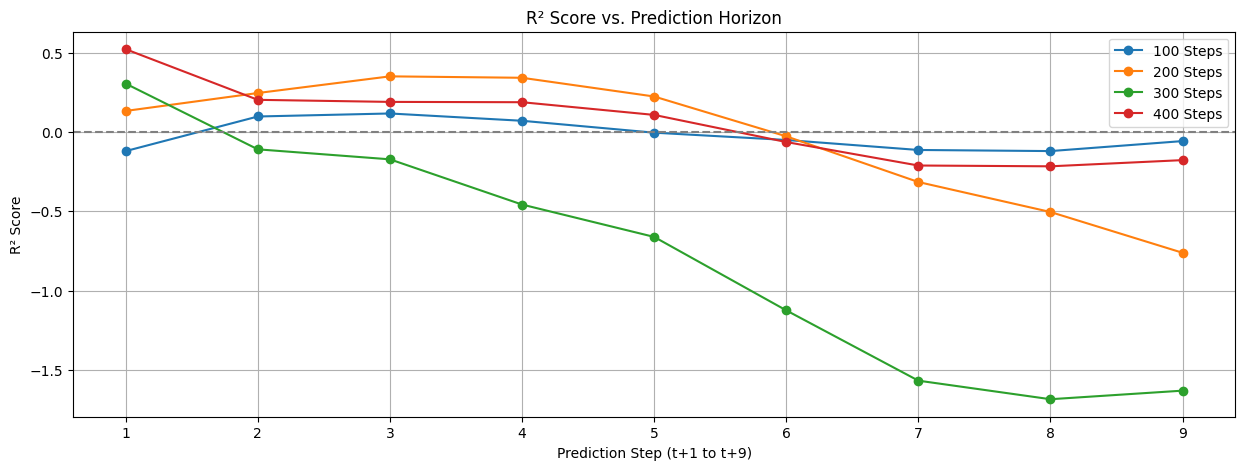

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
